**<font size=5>EARLY DETECTION OF MENTAL ILLNESS USING AI</font>**

**CAPSTONE-2**

**Group- 6**

In [72]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import io
import requests
warnings.filterwarnings("ignore")

In [73]:
# Load data
df_url = 'https://raw.githubusercontent.com/AnjuSalyGeorge/Capstone-Project-2-Group-6----Early-detection-of-mental-illness-using-AI-/refs/heads/main/Understanding%20Mental%20Illness%20in%20the%20Community%20(Responses)%20-%20Form%20Responses%201.csv'
url_content = requests.get(df_url, verify=False).content

#Read the imported CSV data into a DataFrame
data = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

In [74]:
#Display top 5 rows
data.head()

,Timestamp,"By clicking ""I Agree"" below, you confirm that:\nYou have read and understood the purpose of this survey.\nYou consent to participate in this survey.",1. What is your age?,2. What is your gender?,3 How do you identify your ethnic background? (Select all that apply),4. What is your current employment status?,5. How often do you feel that your workload is difficult to manage?,6. How frequently do you experience feelings of burnout or exhaustion related to work?,"7. In the past year, have you taken any days off specifically due to stress, anxiety, or mental health reasons?","8. On an average, how many hours do you sleep per night?",...,"12. How often do you engage in the following behaviors as a response to stress or for relaxation? (Select all that apply) [Caffeine Intake (e.g., coffee, tea,energy drinks)]",12. How often do you engage in the following behaviors as a response to stress or for relaxation? (Select all that apply) [Consumption of Sugary or High-Calorie Snacks],"13. How often do you experience feelings of sadness, hopelessness, or mood swings?",15. Have you been diagnosed with a mental health disorder?,"14. Are you currently experiencing any mental health-related challenges (e.g., anxiety, depression, bipolar disorder, OCD, Sleep disorder,Postpartum, etc.)?","16. Do you have a family history of mental health disorders(e.g., Alzheimer's,Dementia,Sleep disorders ,Postpartum,Addiction to alcohol and drugs, etc.)?",17. How satisfied are you with your current work-life balance?,18. What coping strategies do you use to manage mental health or stress? (Select all that apply),"19. When faced with stress, how likely are you to seek help from a mental health professional?","20. How often do you engage in activities specifically for relaxation (e.g., meditation, reading, etc)?"
0,12/19/2024 14:57:30,I Agree,25-34,Female,"Asian (e.g., China, India, Japan, Philippines)",Part-time,Often,Often,No,6 - 7 hours,...,Regularly,Regularly,Weekly,No,No,Yes,Satisfied,"Journaling, Other",Very likely,Daily
1,12/19/2024 15:01:24,I Agree,25-34,Female,"Asian (e.g., China, India, Japan, Philippines)",Student,Rarely,Rarely,No,8 - 9 hours,...,Regularly,Regularly,Rarely,No,No,No,Neutral,Other,Very unlikely,Weekly
2,12/19/2024 15:54:23,I Agree,18-24,Female,"Asian (e.g., China, India, Japan, Philippines)",Part-time,Rarely,Rarely,No,6 - 7 hours,...,Rarely,Rarely,Monthly,No,No,No,Satisfied,Physical activity,Likely,Never
3,12/19/2024 15:54:42,I Agree,25-34,Female,"Asian (e.g., China, India, Japan, Philippines)",Part-time,Sometimes,Sometimes,Yes,8 - 9 hours,...,Never,Never,Monthly,No,No,No,Satisfied,Other,Neutral,Daily
4,12/19/2024 17:17:41,I Agree,25-34,Male,"Asian (e.g., China, India, Japan, Philippines)",Student,Often,Often,Yes,6 - 7 hours,...,Regularly,Occasionally,Daily,No,No,Yes,Dissatisfied,Social support,Neutral,Rarely


In [75]:
# Displays a summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 25 columns):
 #   Column                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                              --------------  ----- 
 0   Timestamp                                                                                                                                                                           499 non-null    object
 1   By clicking "I Agree" below, you confirm that:
You have read and understood the purpose of this survey.
You consent to participate in this survey.                                  499 non-null    object
 2     1. What is your age?                                    

In [76]:
#Dropping 'Timestamp' column
df = data.drop('Timestamp', axis=1).drop('By clicking "I Agree" below, you confirm that:\nYou have read and understood the purpose of this survey.\nYou consent to participate in this survey.', axis=1)


In [77]:
# Creating new dataframe mental_health_df
mental_health_df = df.copy()

# Removes any leading or trailing spaces from column names.
mental_health_df.columns = mental_health_df.columns.str.strip()
mental_health_df.columns

Index(['1. What is your age?', '2. What is your gender?',
       '3 How do you identify your ethnic background? (Select all that apply)',
       '4. What is your current employment status?',
       '5. How often do you feel that your workload is difficult to manage?',
       '6. How frequently do you experience feelings of burnout or exhaustion related to work?',
       '7. In the past year, have you taken any days off specifically due to stress, anxiety, or mental health reasons?',
       '8. On an average, how many hours do you sleep per night?',
       '9. How many hours of physical activity (e.g., exercise, walking) do you engage in per week?',
       '10. Do you find it challenging to relax after work or other responsibilities?',
       '11. Have you experienced significant changes in your appetite or weight within the past three months?',
       '12. How often do you engage in the following behaviors as a response to stress or for relaxation? (Select all that apply)    [Alcohol C

In [78]:
# Creating a dictionary for mapping old column names to new ones
column_rename_mapping = {
    '1. What is your age?': 'Age',
    '2. What is your gender?': 'Gender',
    '3 How do you identify your ethnic background? (Select all that apply)': 'Ethnicity',
    '4. What is your current employment status?': 'Employment_Status',
    '5. How often do you feel that your workload is difficult to manage?': 'Workload_Manageability',
    '6. How frequently do you experience feelings of burnout or exhaustion related to work?': 'Burnout_Frequency',
    '7. In the past year, have you taken any days off specifically due to stress, anxiety, or mental health reasons?': 'Days_Off_Mental_Health',
    '8. On an average, how many hours do you sleep per night?': 'Sleep_Hours',
    '9. How many hours of physical activity (e.g., exercise, walking) do you engage in per week?': 'Physical_Activity_Hours',
    '10. Do you find it challenging to relax after work or other responsibilities?': 'Relaxation_Challenge',
    '11. Have you experienced significant changes in your appetite or weight within the past three months?': 'Appetite_Changes',
    '12. How often do you engage in the following behaviors as a response to stress or for relaxation? (Select all that apply)    [Alcohol Consumption]': 'Alcohol_Consumption',
    '12. How often do you engage in the following behaviors as a response to stress or for relaxation? (Select all that apply)    [Smoking]': 'Smoking',
    '12. How often do you engage in the following behaviors as a response to stress or for relaxation? (Select all that apply)    [Caffeine Intake (e.g., coffee, tea,energy drinks)]': 'Caffeine_Intake',
    '12. How often do you engage in the following behaviors as a response to stress or for relaxation? (Select all that apply)    [Consumption of Sugary or High-Calorie Snacks]': 'Sugary_Snacks',
    '13. How often do you experience feelings of sadness, hopelessness, or mood swings?': 'Mood_Swings',

    '14. Are you currently experiencing any mental health-related challenges (e.g., anxiety, depression, bipolar disorder, OCD, Sleep disorder,Postpartum, etc.)?': 'Current_Mental_Health_Challenges',
    '15. Have you been diagnosed with a mental health disorder?': 'Mental_Health_Diagnosis',
    '16. Do you have a family history of mental health disorders(e.g., Alzheimer\'s,Dementia,Sleep disorders ,Postpartum,Addiction to alcohol and drugs, etc.)?': 'Family_History_Mental_Health',
    '17. How satisfied are you with your current work-life balance?': 'Work_Life_Balance_Satisfaction',
    '18. What coping strategies do you use to manage mental health or stress? (Select all that apply)':'coping_strategy',
    '19. When faced with stress, how likely are you to seek help from a mental health professional?': 'Help_Seeking_Behavior',
    '20. How often do you engage in activities specifically for relaxation (e.g., meditation, reading, etc)?': 'Relaxation_Activities'
}

# Rename the columns in the new dataframe
mental_health_df.rename(columns=column_rename_mapping, inplace=True)

# Display the renamed column names in data frame
mental_health_df.columns

Index(['Age', 'Gender', 'Ethnicity', 'Employment_Status',
       'Workload_Manageability', 'Burnout_Frequency', 'Days_Off_Mental_Health',
       'Sleep_Hours', 'Physical_Activity_Hours', 'Relaxation_Challenge',
       'Appetite_Changes', 'Alcohol_Consumption', 'Smoking', 'Caffeine_Intake',
       'Sugary_Snacks', 'Mood_Swings', 'Mental_Health_Diagnosis',
       'Current_Mental_Health_Challenges', 'Family_History_Mental_Health',
       'Work_Life_Balance_Satisfaction', 'coping_strategy',
       'Help_Seeking_Behavior', 'Relaxation_Activities'],
      dtype='object')

In [79]:
mental_health_df.head()

,Age,Gender,Ethnicity,Employment_Status,Workload_Manageability,Burnout_Frequency,Days_Off_Mental_Health,Sleep_Hours,Physical_Activity_Hours,Relaxation_Challenge,...,Caffeine_Intake,Sugary_Snacks,Mood_Swings,Mental_Health_Diagnosis,Current_Mental_Health_Challenges,Family_History_Mental_Health,Work_Life_Balance_Satisfaction,coping_strategy,Help_Seeking_Behavior,Relaxation_Activities
0,25-34,Female,"Asian (e.g., China, India, Japan, Philippines)",Part-time,Often,Often,No,6 - 7 hours,Less than 1 hour,Sometimes,...,Regularly,Regularly,Weekly,No,No,Yes,Satisfied,"Journaling, Other",Very likely,Daily
1,25-34,Female,"Asian (e.g., China, India, Japan, Philippines)",Student,Rarely,Rarely,No,8 - 9 hours,Less than 1 hour,Sometimes,...,Regularly,Regularly,Rarely,No,No,No,Neutral,Other,Very unlikely,Weekly
2,18-24,Female,"Asian (e.g., China, India, Japan, Philippines)",Part-time,Rarely,Rarely,No,6 - 7 hours,Less than 1 hour,Sometimes,...,Rarely,Rarely,Monthly,No,No,No,Satisfied,Physical activity,Likely,Never
3,25-34,Female,"Asian (e.g., China, India, Japan, Philippines)",Part-time,Sometimes,Sometimes,Yes,8 - 9 hours,3 - 4 hours,Sometimes,...,Never,Never,Monthly,No,No,No,Satisfied,Other,Neutral,Daily
4,25-34,Male,"Asian (e.g., China, India, Japan, Philippines)",Student,Often,Often,Yes,6 - 7 hours,Less than 1 hour,Sometimes,...,Regularly,Occasionally,Daily,No,No,Yes,Dissatisfied,Social support,Neutral,Rarely


In [80]:
#Checking for null values
mental_health_df.isnull().sum()

Age                                  1
Gender                               1
Ethnicity                            2
Employment_Status                    1
Workload_Manageability               2
Burnout_Frequency                    3
Days_Off_Mental_Health               7
Sleep_Hours                          5
Physical_Activity_Hours              2
Relaxation_Challenge                 6
Appetite_Changes                     7
Alcohol_Consumption                 62
Smoking                             79
Caffeine_Intake                     29
Sugary_Snacks                       37
Mood_Swings                          6
Mental_Health_Diagnosis              4
Current_Mental_Health_Challenges     7
Family_History_Mental_Health         4
Work_Life_Balance_Satisfaction       6
coping_strategy                      9
Help_Seeking_Behavior               13
Relaxation_Activities                6
dtype: int64

**DATA CLEANING AND PRE PROCESSING**

**1. Age**

In [81]:
# Counts the occurrences of each unique age value, including NaN values.
mental_health_df['Age'].value_counts(dropna=False)

Age
25-34           226
18-24           216
35-44            38
45-54            11
55 and above      7
NaN               1
Name: count, dtype: int64

In [82]:
# Drop rows with NaN values in the 'Age' column
mental_health_df = mental_health_df.dropna(subset=['Age'])

**2. Gender**

In [83]:
# Counts the occurrences of each unique Gender values, including NaN values.
mental_health_df['Gender'].value_counts(dropna=False)

Gender
Female                     260
Male                       228
Prefer not to say            6
Non-binary/Third gender      2
NaN                          1
Other                        1
Name: count, dtype: int64

In [84]:
# Drop rows with NaN values in the 'Gender' column
mental_health_df = mental_health_df.dropna(subset=['Gender'])

In [85]:
# Replace "Non-binary/Third gender" and "Other" with "Other/Non-binary" in the 'Gender' column
mental_health_df['Gender'] = mental_health_df['Gender'].replace({
    'Non-binary/Third gender': 'Other/Non-binary',
    'Other': 'Other/Non-binary'
})


In [86]:
mental_health_df['Gender'].value_counts(dropna=False)

Gender
Female               260
Male                 228
Prefer not to say      6
Other/Non-binary       3
Name: count, dtype: int64

**3. Ethnicity**

In [87]:
# Counts the occurrences of each unique Ethnicity values, including NaN values.
mental_health_df['Ethnicity'].value_counts(dropna=False)

Ethnicity
Asian (e.g., China, India, Japan, Philippines)                      379
Caucasian (e.g., United States, Canada, United Kingdom, Germany)     53
Other                                                                17
Middle Eastern (e.g., Saudi Arabia, Iran, Iraq)                      16
African (e.g., Nigeria, Kenya, Egypt)                                14
Prefer not to say                                                     9
Indigenous (e.g., Native American, First Nations, Aboriginal)         4
Hispanic/Latino (e.g., Mexico, Puerto Rico, Brazil, Spain)            3
NaN                                                                   2
Name: count, dtype: int64

In [88]:
# Function to clean ethnicity values
def clean_ethnicity(ethnicity_str):
    if pd.isna(ethnicity_str):
        return ethnicity_str

    parts = ethnicity_str.split('(')
    return parts[0].strip()

# Apply the cleaning function to the 'Ethnicity' column
mental_health_df['Ethnicity'] = mental_health_df['Ethnicity'].apply(clean_ethnicity)

In [89]:
# Drop rows with NaN values
mental_health_df = mental_health_df.dropna(subset=['Ethnicity'])

In [90]:
mental_health_df['Ethnicity'].value_counts(dropna=False)

Ethnicity
Asian                379
Caucasian             53
Other                 17
Middle Eastern        16
African               14
Prefer not to say      9
Indigenous             4
Hispanic/Latino        3
Name: count, dtype: int64

**4. Employment status**

In [91]:
# Counts the occurrences of each unique Employment_Status values, including NaN values.
mental_health_df['Employment_Status'].value_counts(dropna=False)

Employment_Status
Student          160
Full-time        150
Part-time        122
Unemployed        36
Self-employed     22
Retired            4
NaN                1
Name: count, dtype: int64

In [92]:
# Drop rows with NaN values
mental_health_df = mental_health_df.dropna(subset=['Employment_Status'])

**5. Workload Manageability**

In [93]:
# Counts the occurrences of each unique Workload_Manageability values, including NaN values.
mental_health_df['Workload_Manageability'].value_counts(dropna=False)

Workload_Manageability
Sometimes         244
Rarely             88
Often              67
Never              49
Not applicable     23
Always             22
NaN                 1
Name: count, dtype: int64

In [94]:
# Drop rows with NaN values
mental_health_df = mental_health_df.dropna(subset=['Workload_Manageability'])

**6. Burnout Frequency**

In [95]:
# Counts the occurrences of each unique Burnout_Frequency values, including NaN values.
mental_health_df['Burnout_Frequency'].value_counts(dropna=False)

Burnout_Frequency
Sometimes         220
Rarely             96
Often              81
Never              48
Always             28
Not applicable     19
NaN                 1
Name: count, dtype: int64

In [96]:
# Drop rows with NaN values
mental_health_df = mental_health_df.dropna(subset=['Burnout_Frequency'])

**7. Days off Mental Health**

In [97]:
# Counts the occurrences of each unique Days_Off_Mental_Health values, including NaN values.
mental_health_df['Days_Off_Mental_Health'].value_counts(dropna=False)

Days_Off_Mental_Health
No                293
Yes               167
Not applicable     26
NaN                 6
Name: count, dtype: int64

In [98]:
# Replace NaN values in 'Days_Off_Mental_Health' with 'Unknown'
mental_health_df['Days_Off_Mental_Health'] = mental_health_df['Days_Off_Mental_Health'].fillna('Unknown')


**8. Sleep Hours**

In [99]:
# Counts the occurrences of each unique Sleep_Hours values, including NaN values.
mental_health_df['Sleep_Hours'].value_counts(dropna=False)

Sleep_Hours
6 - 7 hours          306
8 - 9 hours           85
4 - 5 hours           77
Less than 4 hours     13
More than 9 hours      6
NaN                    5
Name: count, dtype: int64

In [100]:
# Replace NaN values in 'Sleep_Hours' with 'Unknown'
mental_health_df['Sleep_Hours'] = mental_health_df['Sleep_Hours'].fillna('Unknown')

**9. Physical Activity Hours**

In [101]:
# Counts the occurrences of each unique Physical_Activity_Hours values, including NaN values.
mental_health_df['Physical_Activity_Hours'].value_counts(dropna=False)

Physical_Activity_Hours
Less than 1 hour     228
1 - 2 hours          126
3 - 4 hours           67
5 - 6 hours           38
More than 6 hours     31
NaN                    2
Name: count, dtype: int64

In [102]:
# Drop rows with NaN values
mental_health_df = mental_health_df.dropna(subset=['Physical_Activity_Hours'])

**10. Relaxation Challenge**

In [103]:
# Counts the occurrences of each unique Relaxation_Challenge values, including NaN values.
mental_health_df['Relaxation_Challenge'].value_counts(dropna=False)

Relaxation_Challenge
Sometimes         177
Rarely            119
Never              82
Often              49
Always             42
Not Applicable     12
Option 1            5
NaN                 4
Name: count, dtype: int64

In [104]:
# Replace 'Option 1' with 'Never' in 'Relaxation_Challenge' column
mental_health_df['Relaxation_Challenge'] = mental_health_df['Relaxation_Challenge'].replace('Option 1', 'Never')

In [105]:
# Replace 'nan' with 'Unknown' in 'Relaxation_Challenge' column
mental_health_df['Relaxation_Challenge'] = mental_health_df['Relaxation_Challenge'].fillna('Unknown')

**11. Appetite Changes**

In [106]:
# Counts the occurrences of each unique Appetite_Changes values, including NaN values.
mental_health_df['Appetite_Changes'].value_counts(dropna=False)

Appetite_Changes
Yes               258
No                215
Not Applicable     12
NaN                 5
Name: count, dtype: int64

In [107]:
# Replace 'nan' with 'Unknown' in 'Appetite_Changes' column
mental_health_df['Appetite_Changes'] = mental_health_df['Appetite_Changes'].fillna('Unknown')

**12.1  Alcohol Consumption**

In [108]:
# Counts the occurrences of each unique Alcohol_Consumption values, including NaN values.
mental_health_df['Alcohol_Consumption'].value_counts(dropna=False)

Alcohol_Consumption
Never           245
Rarely           99
Occasionally     71
NaN              57
Regularly        18
Name: count, dtype: int64

In [109]:
# Replace 'nan' with 'Unknown' in 'Alcohol_Consumption' column
mental_health_df['Alcohol_Consumption'] = mental_health_df['Alcohol_Consumption'].fillna('Unknown')

**12.2. Smoking**

In [110]:
# Counts the occurrences of each unique Smoking values, including NaN values.
mental_health_df['Smoking'].value_counts(dropna=False)

Smoking
Never           309
NaN              74
Rarely           50
Regularly        39
Occasionally     18
Name: count, dtype: int64

In [111]:
# Replace 'nan' with 'Unknown' in 'Smoking' column
mental_health_df['Smoking'] = mental_health_df['Smoking'].fillna('Unknown')

**12.3. Caffeine Intake**

In [112]:
# Counts the occurrences of each unique Caffeine_Intake values, including NaN values.
mental_health_df['Caffeine_Intake'].value_counts(dropna=False)

Caffeine_Intake
Regularly       188
Occasionally    104
Rarely           90
Never            82
NaN              26
Name: count, dtype: int64

In [113]:
# Replace 'nan' with 'Unknown' in 'Caffeine_Intake' column
mental_health_df['Caffeine_Intake'] = mental_health_df['Caffeine_Intake'].fillna('Unknown')

**12.4. Sugary Snacks**

In [114]:
# Counts the occurrences of each unique Sugary_Snacks values, including NaN values.
mental_health_df['Sugary_Snacks'].value_counts(dropna=False)

Sugary_Snacks
Occasionally    185
Regularly       102
Rarely           99
Never            71
NaN              33
Name: count, dtype: int64

In [115]:
# Replace 'nan' with 'Unknown' in 'Sugary_Snacks' column
mental_health_df['Sugary_Snacks'] = mental_health_df['Sugary_Snacks'].fillna('Unknown')

**13. Mood Swings**

In [116]:
# Counts the occurrences of each unique Mood_Swings values, including NaN values.
mental_health_df['Mood_Swings'].value_counts(dropna=False)

Mood_Swings
Rarely     152
Weekly     126
Daily       86
Monthly     83
Never       39
NaN          4
Name: count, dtype: int64

In [117]:
# Replace 'nan' with 'Unknown' in 'Mood_Swings' column
mental_health_df['Mood_Swings'] = mental_health_df['Mood_Swings'].fillna('Unknown')

**14. Mental_Health_Diagnosis**

In [118]:
# Counts the occurrences of each unique Mental_Health_Diagnosis values, including NaN values.
mental_health_df['Mental_Health_Diagnosis'].value_counts(dropna=False)

Mental_Health_Diagnosis
No                   426
Yes                   45
Prefer not to say     16
NaN                    3
Name: count, dtype: int64

In [119]:
# Drop rows with NaN values in 'Mental_Health_Diagnosis' column
mental_health_df = mental_health_df.dropna(subset=['Mental_Health_Diagnosis'])

**15. Current_Mental_Health_Challenges**

In [120]:
# Counts the occurrences of each unique Current_Mental_Health_Challenges, including NaN values
mental_health_df['Current_Mental_Health_Challenges'].value_counts(dropna=False)

Current_Mental_Health_Challenges
No                   316
Yes                  131
Prefer not to say     37
NaN                    3
Name: count, dtype: int64

In [121]:
# Replace 'nan' with 'Unknown' in 'Current_Mental_Health_Challenges' column
mental_health_df['Current_Mental_Health_Challenges'] = mental_health_df['Current_Mental_Health_Challenges'].fillna('Unknown')

**16. Family History Mental Health**

In [122]:
# Counts the occurrences of each unique Family_History_Mental_Health, including NaN values
mental_health_df['Family_History_Mental_Health'].value_counts(dropna=False)

Family_History_Mental_Health
No                   407
Yes                   66
Prefer not to say     13
NaN                    1
Name: count, dtype: int64

In [123]:
# Replace 'nan' with 'Unknown' in 'Family_History_Mental_Health' column
mental_health_df['Family_History_Mental_Health'] = mental_health_df['Family_History_Mental_Health'].fillna('Unknown')

**17. Work Life Balance Satisfaction**

In [124]:
# Counts the occurrences of each unique Work_Life_Balance_Satisfaction, including NaN values
mental_health_df['Work_Life_Balance_Satisfaction'].value_counts(dropna=False)

Work_Life_Balance_Satisfaction
Neutral              242
Satisfied            141
Dissatisfied          56
Very satisfied        37
Very dissatisfied      9
NaN                    2
Name: count, dtype: int64

In [125]:
# Replace 'nan' with 'Unknown' in 'Work_Life_Balance_Satisfaction' column
mental_health_df['Work_Life_Balance_Satisfaction'] = mental_health_df['Work_Life_Balance_Satisfaction'].fillna('Unknown')

**18. Coping strategy**

In [126]:
# Counts the occurrences of each unique coping_strategy, including NaN values
mental_health_df['coping_strategy'].value_counts(dropna=False)

coping_strategy
Other                                78
Physical activity                    64
Avoidance                            35
Social support                       33
Physical activity, Social support    32
                                     ..
Meditation, Journaling, Avoidance     1
Physical activity, Journaling         1
Therapy, Journaling, Avoidance        1
Meditation, Therapy, Journaling       1
Meditation, Therapy, Avoidance        1
Name: count, Length: 75, dtype: int64

In [127]:
# Replace 'nan' with 'Unknown' in 'coping_strategy' column
mental_health_df['coping_strategy'] = mental_health_df['coping_strategy'].fillna('Unknown')

**19. Help Seeking Behavior**

In [128]:
# Counts the occurrences of each unique Help_Seeking_Behavior, including NaN values
mental_health_df['Help_Seeking_Behavior'].value_counts(dropna=False)

Help_Seeking_Behavior
Very unlikely    131
Neutral          127
Unlikely         123
Likely            70
Very likely       28
NaN                8
Name: count, dtype: int64

In [129]:
# Replace 'nan' with 'Unknown' in 'Help_Seeking_Behavior' column
mental_health_df['Help_Seeking_Behavior'] = mental_health_df['Help_Seeking_Behavior'].fillna('Unknown')

**20 Relaxation Activities**

In [130]:
# Counts the occurrences of each unique Relaxation_Activities, including NaN values
mental_health_df['Relaxation_Activities'].value_counts(dropna=False)

Relaxation_Activities
Rarely     147
Weekly     125
Daily      107
Never       60
Monthly     47
NaN          1
Name: count, dtype: int64

In [131]:
# Replace 'nan' with 'Unknown' in 'Relaxation_Activities' column
mental_health_df['Relaxation_Activities'] = mental_health_df['Relaxation_Activities'].fillna('Unknown')

In [132]:
# Check for Null values in dataset
mental_health_df.isnull().sum()

Age                                 0
Gender                              0
Ethnicity                           0
Employment_Status                   0
Workload_Manageability              0
Burnout_Frequency                   0
Days_Off_Mental_Health              0
Sleep_Hours                         0
Physical_Activity_Hours             0
Relaxation_Challenge                0
Appetite_Changes                    0
Alcohol_Consumption                 0
Smoking                             0
Caffeine_Intake                     0
Sugary_Snacks                       0
Mood_Swings                         0
Mental_Health_Diagnosis             0
Current_Mental_Health_Challenges    0
Family_History_Mental_Health        0
Work_Life_Balance_Satisfaction      0
coping_strategy                     0
Help_Seeking_Behavior               0
Relaxation_Activities               0
dtype: int64

**REMOVING IRRELEVANT COLUMN**

In [133]:
# Drop the 'coping_strategy' column
mental_health_df = mental_health_df.drop(columns=['coping_strategy'], errors='ignore')

<b>UNIVARIATE ANALYSIS</b>

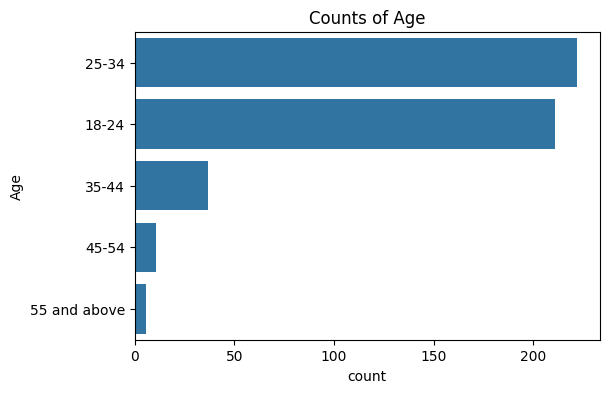

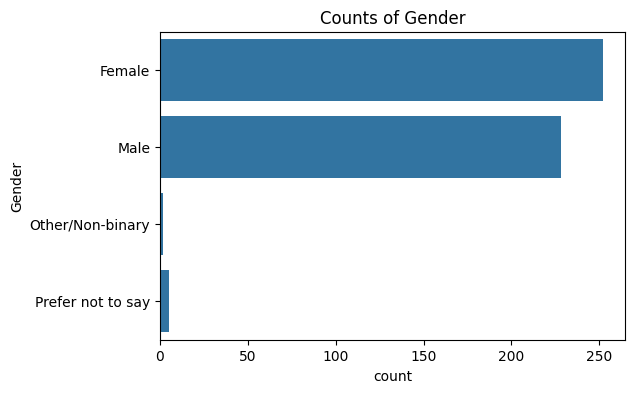

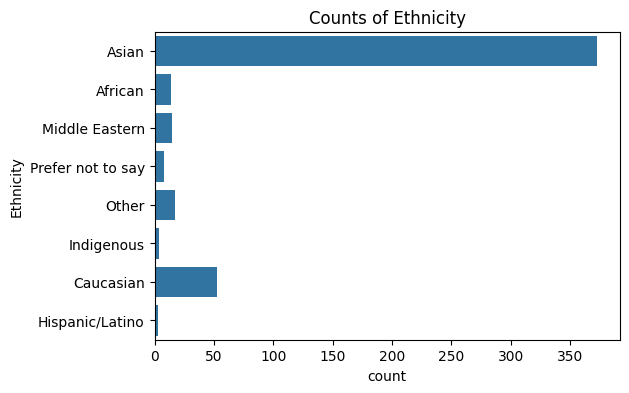

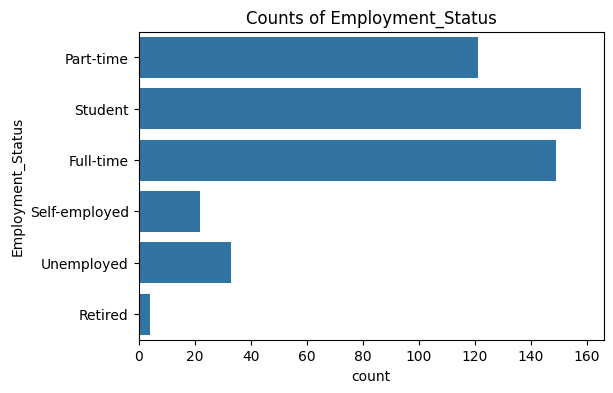

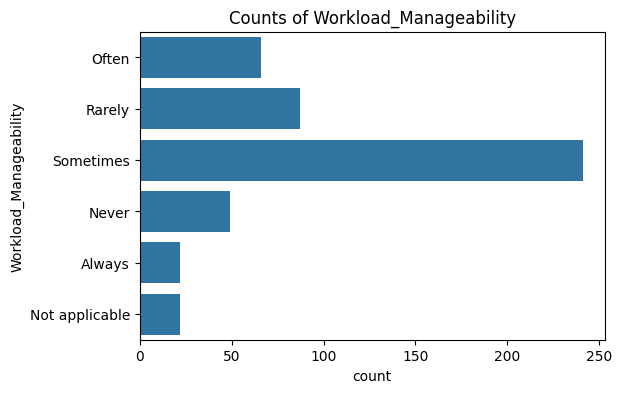

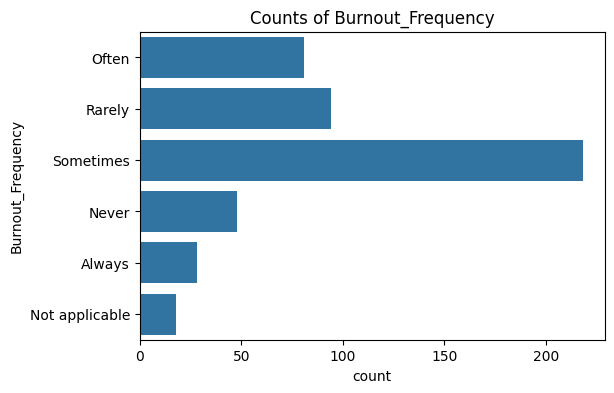

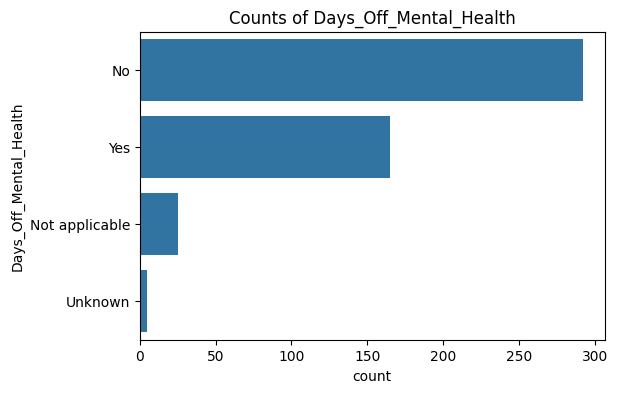

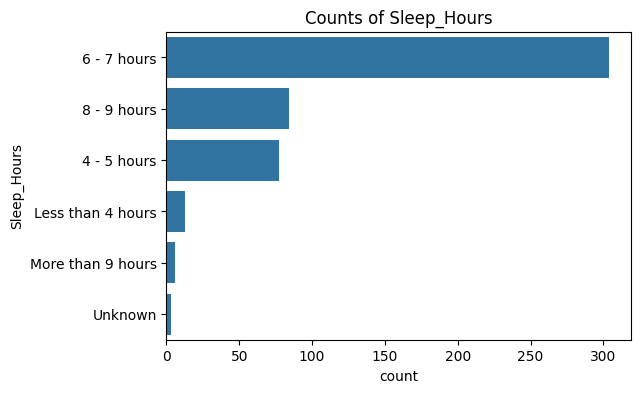

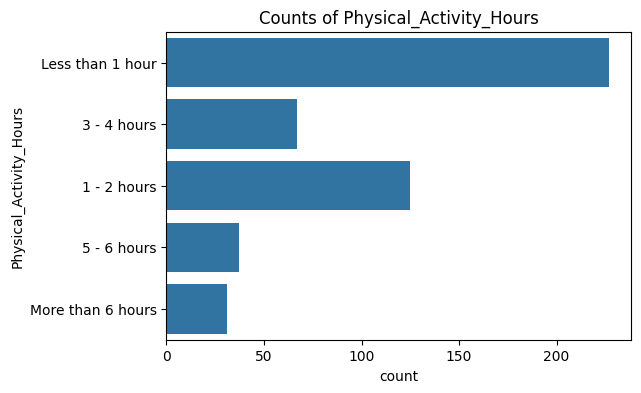

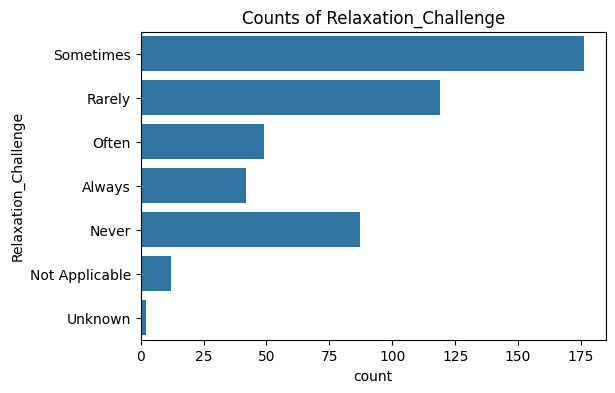

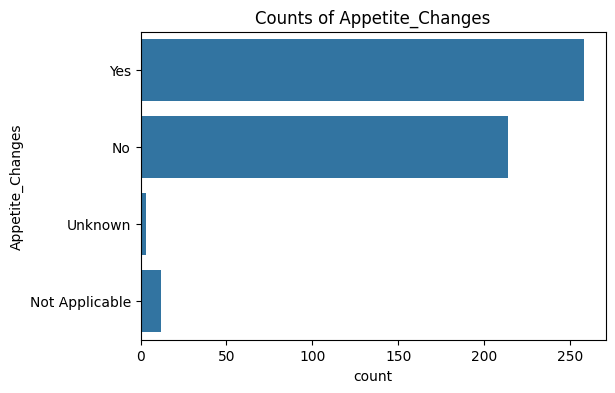

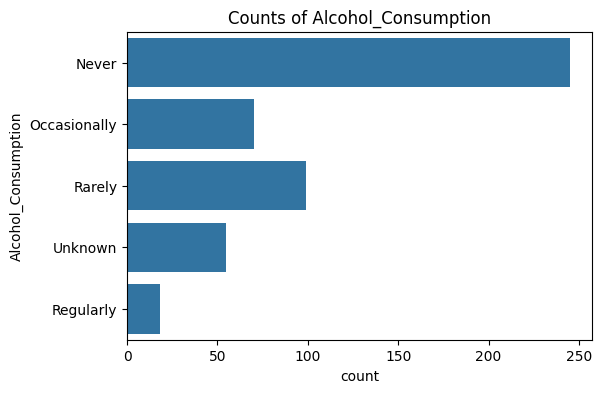

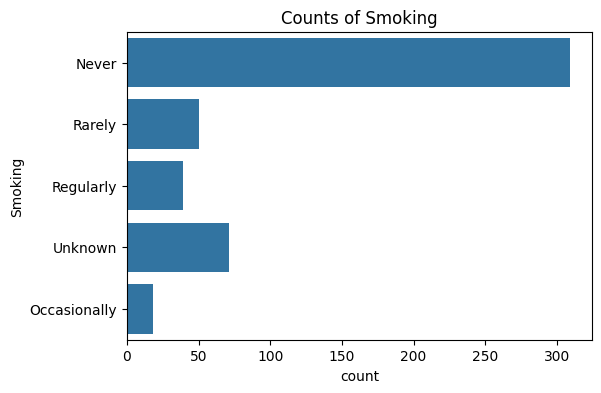

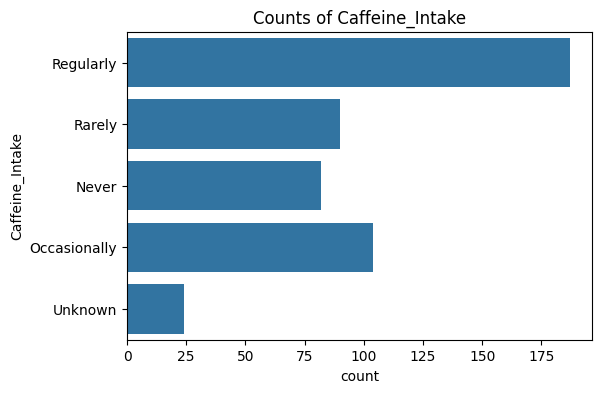

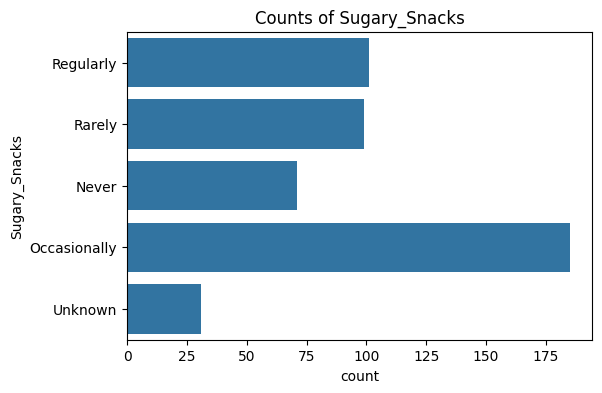

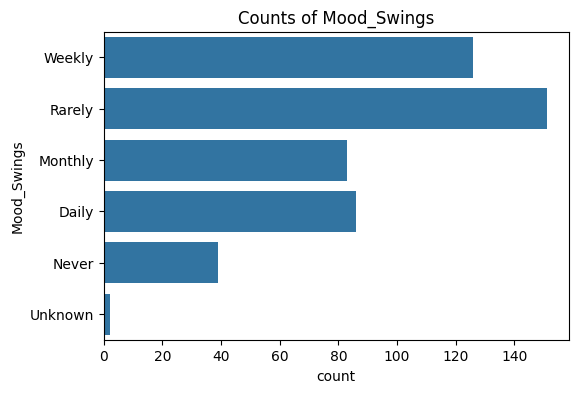

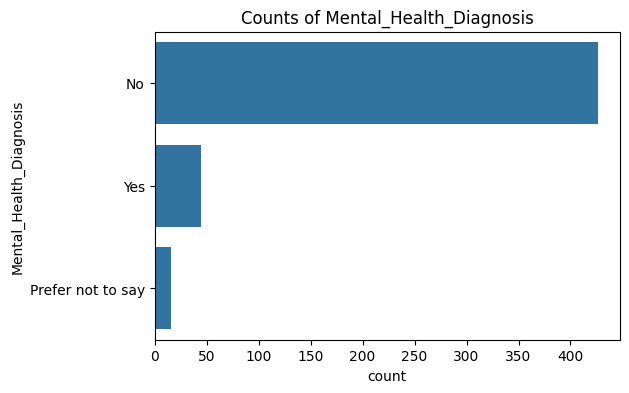

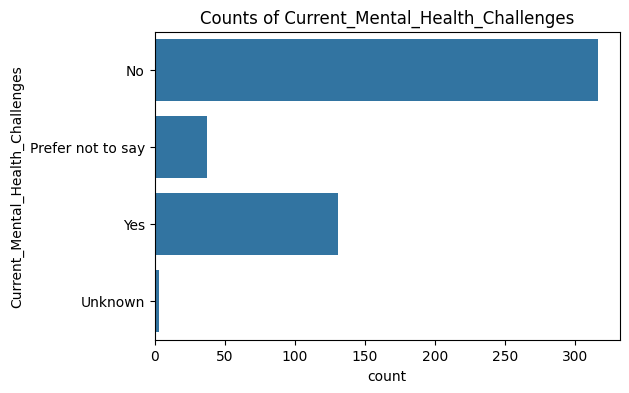

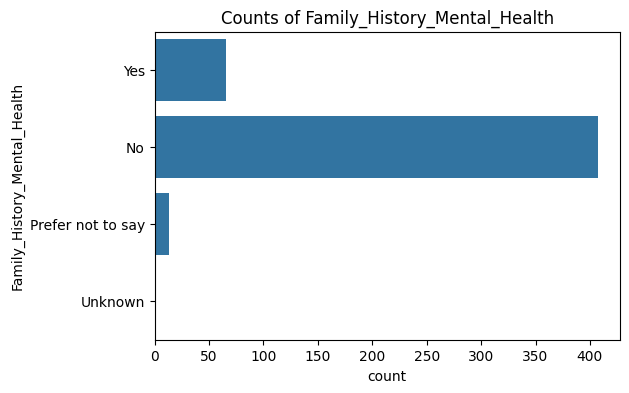

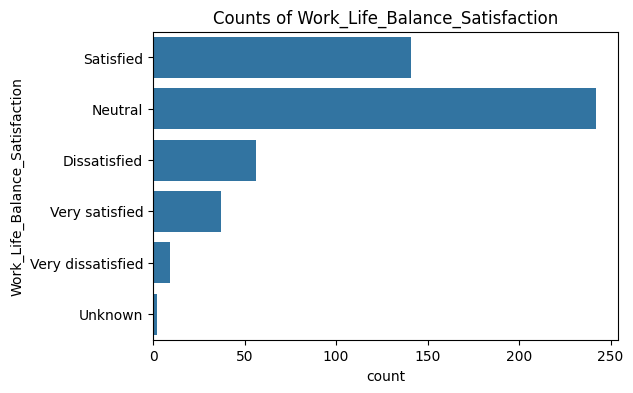

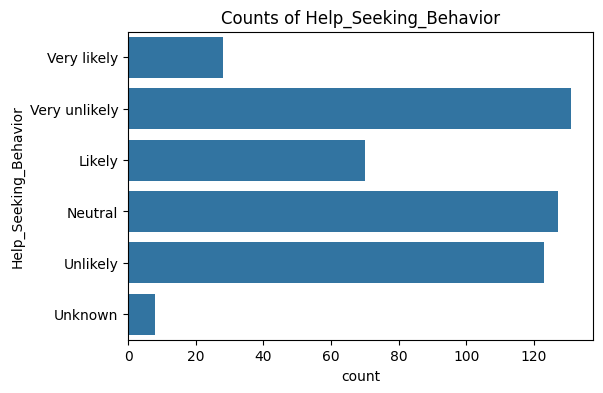

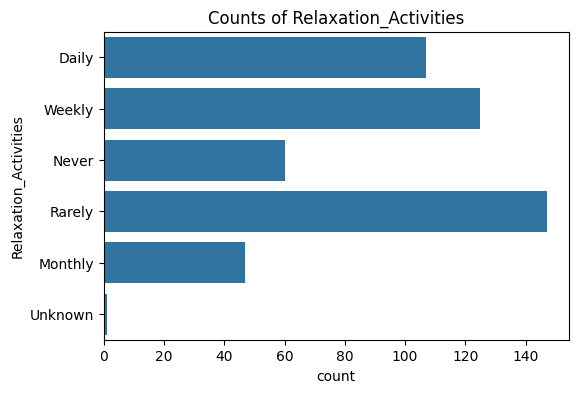

In [134]:
# Iterate through each column in the DataFrame
for column in mental_health_df.columns:
    plt.figure(figsize=(6,4))

    if pd.api.types.is_numeric_dtype(mental_health_df[column]):
        # Creating histogram for numerical columns
        sns.histplot(mental_health_df[column], kde=True)
        plt.title(f'Distribution of {column}')
    else:
        # Creating countplot for categorical column
        sns.countplot(y=column, data=mental_health_df)
        plt.title(f'Counts of {column}')
    plt.show()


**BI VARIATE ANALYSIS**

In [135]:
categorical_columns = ['Age', 'Gender', 'Ethnicity', 'Employment_Status', 'Workload_Manageability',
                       'Burnout_Frequency', 'Days_Off_Mental_Health', 'Sleep_Hours', 'Physical_Activity_Hours',
                       'Relaxation_Challenge', 'Appetite_Changes', 'Alcohol_Consumption', 'Smoking',
                       'Caffeine_Intake', 'Sugary_Snacks', 'Mood_Swings', 'Mental_Health_Diagnosis',
                       'Current_Mental_Health_Challenges', 'Family_History_Mental_Health',
                       'Work_Life_Balance_Satisfaction','Help_Seeking_Behavior',
                       'Relaxation_Activities']

<Figure size 1000x600 with 0 Axes>

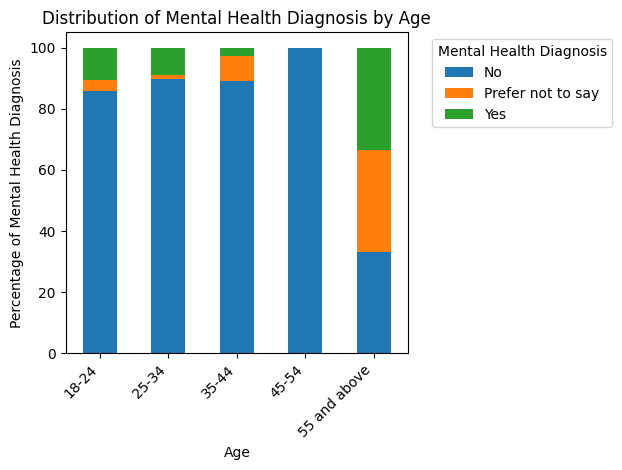

<Figure size 1000x600 with 0 Axes>

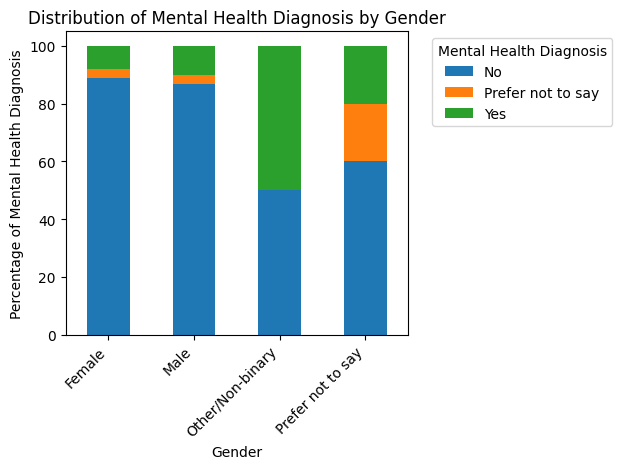

<Figure size 1000x600 with 0 Axes>

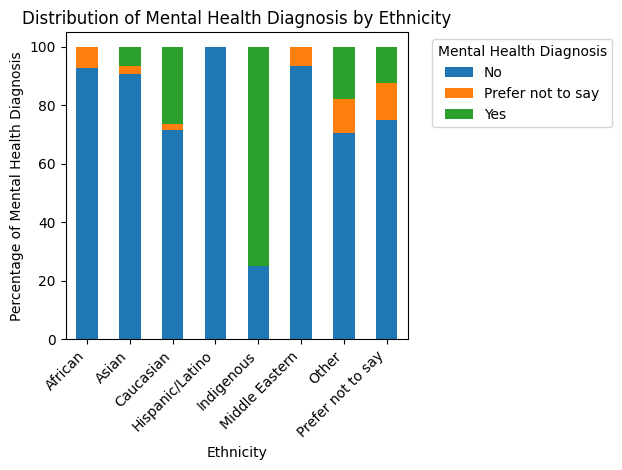

<Figure size 1000x600 with 0 Axes>

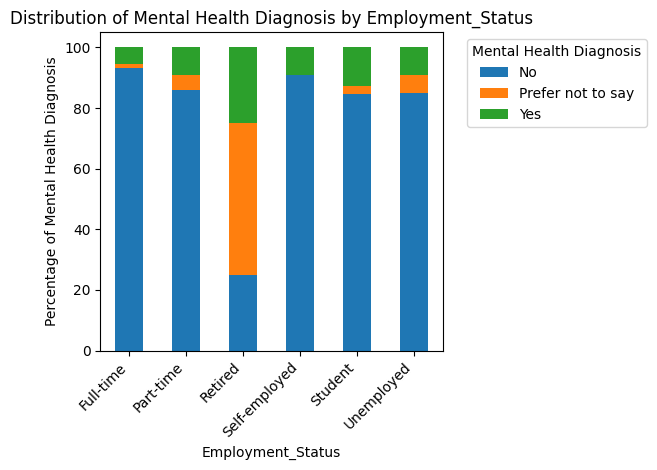

<Figure size 1000x600 with 0 Axes>

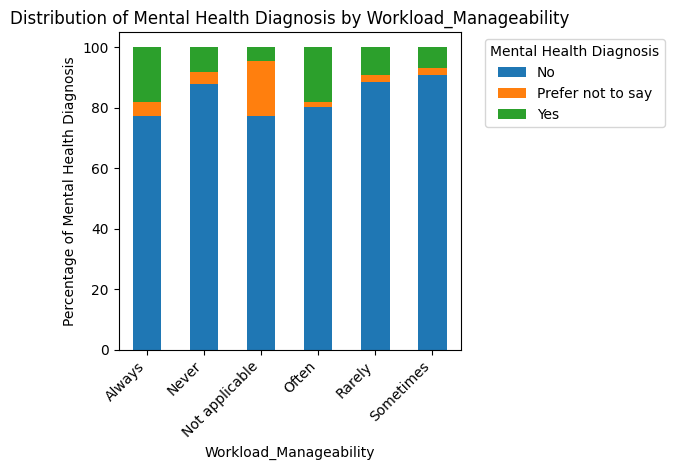

<Figure size 1000x600 with 0 Axes>

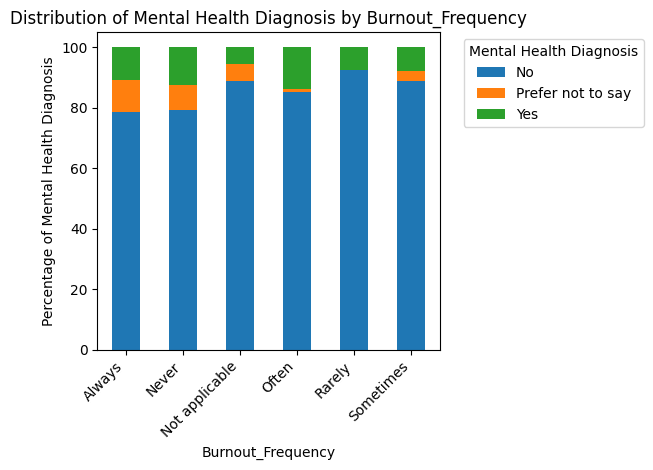

<Figure size 1000x600 with 0 Axes>

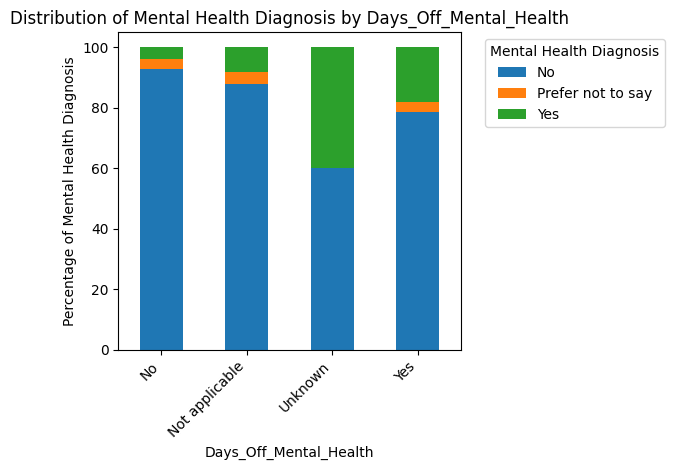

<Figure size 1000x600 with 0 Axes>

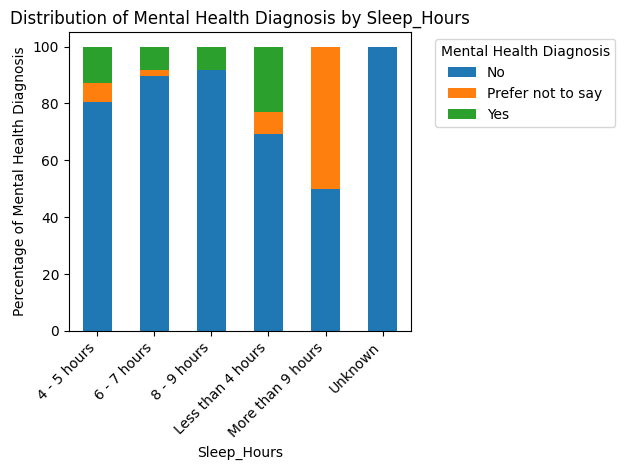

<Figure size 1000x600 with 0 Axes>

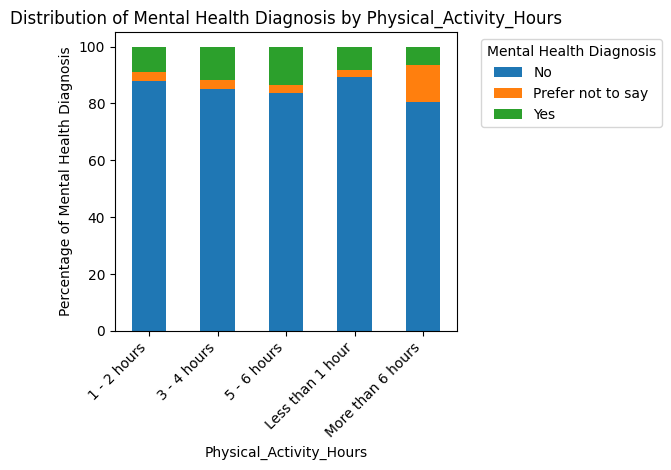

<Figure size 1000x600 with 0 Axes>

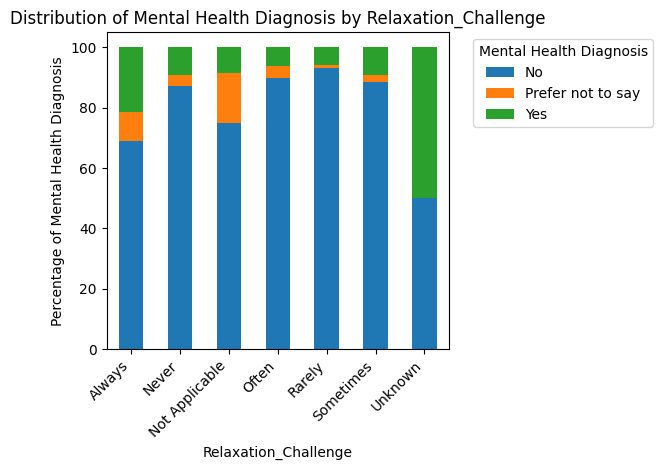

<Figure size 1000x600 with 0 Axes>

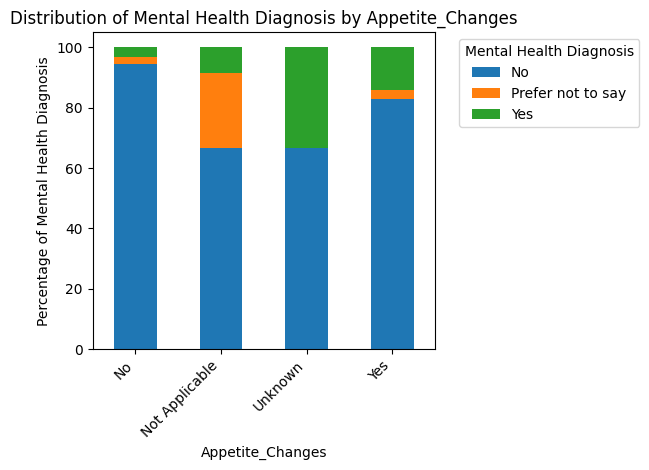

<Figure size 1000x600 with 0 Axes>

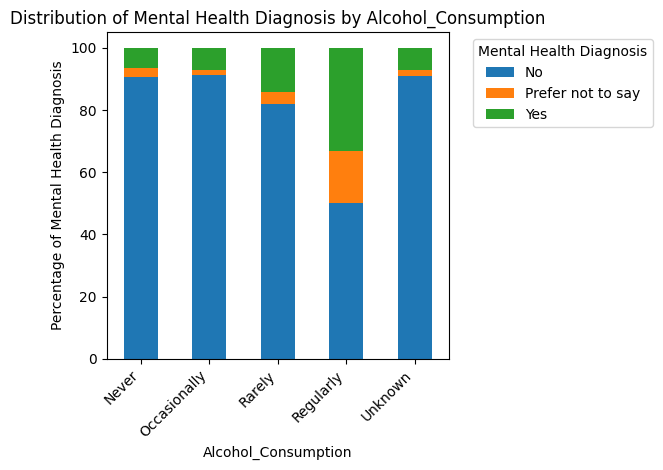

<Figure size 1000x600 with 0 Axes>

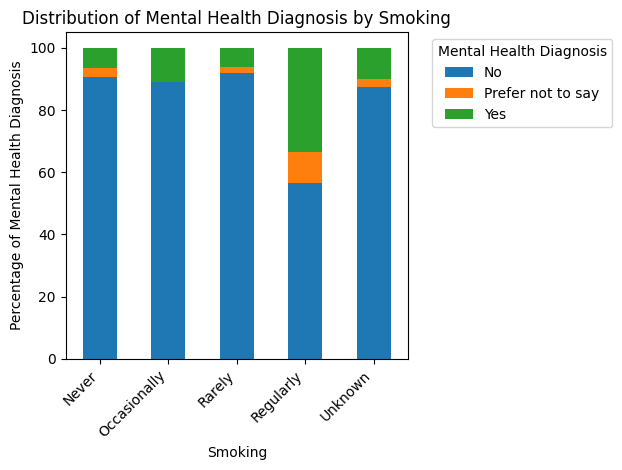

<Figure size 1000x600 with 0 Axes>

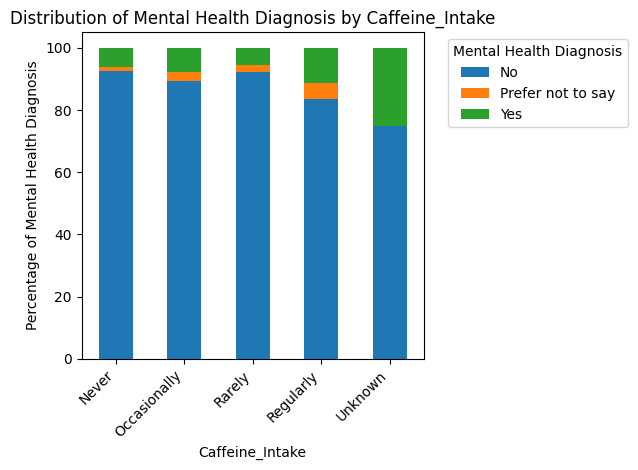

<Figure size 1000x600 with 0 Axes>

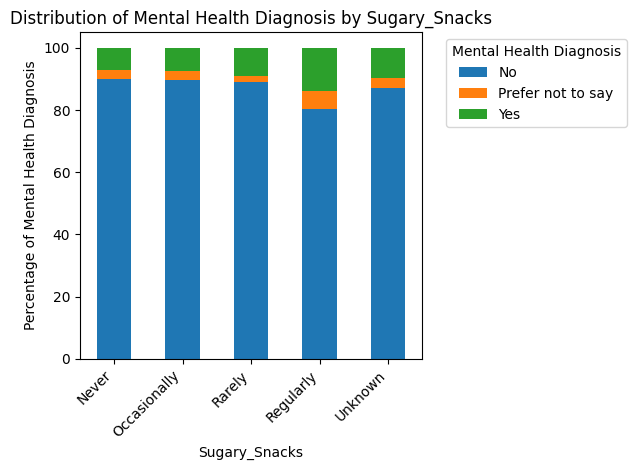

<Figure size 1000x600 with 0 Axes>

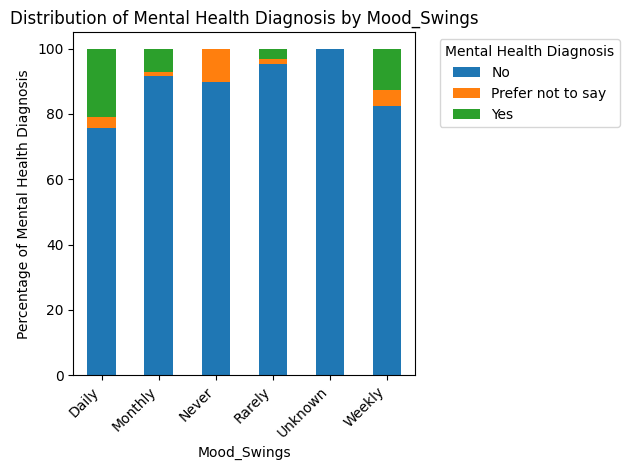

<Figure size 1000x600 with 0 Axes>

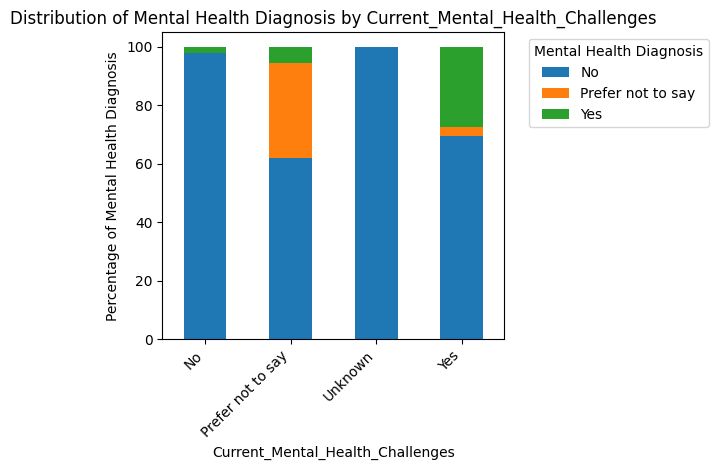

<Figure size 1000x600 with 0 Axes>

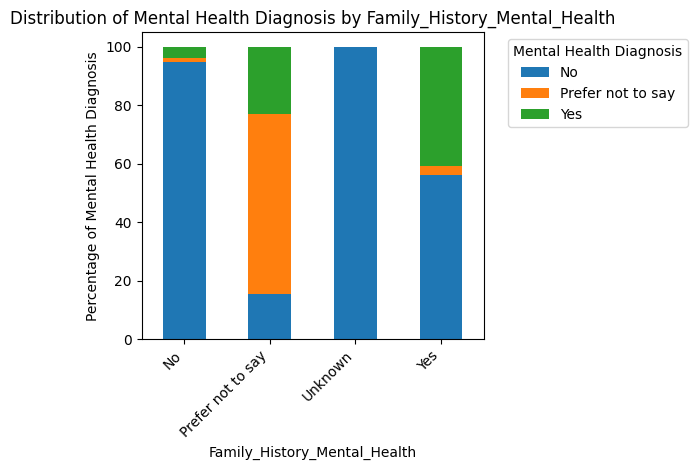

<Figure size 1000x600 with 0 Axes>

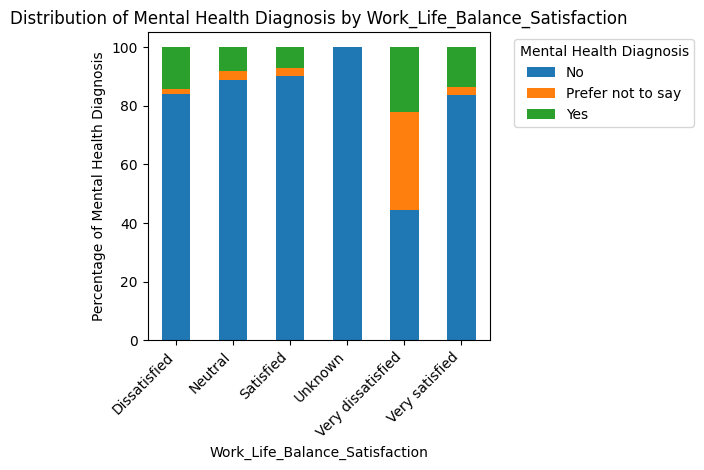

<Figure size 1000x600 with 0 Axes>

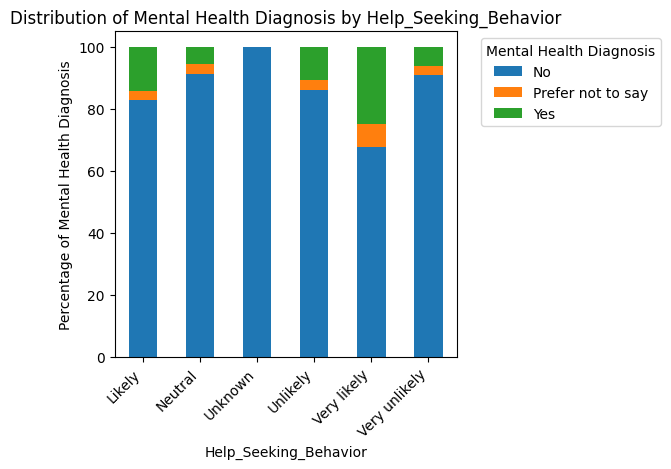

<Figure size 1000x600 with 0 Axes>

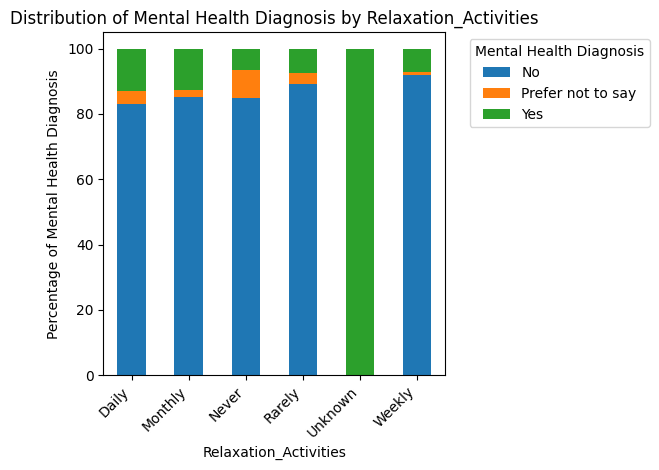

In [136]:
# Calculate the percentage of each category in the target variable
diagnosis_percentages = mental_health_df['Mental_Health_Diagnosis'].value_counts(normalize=True) * 100

# Bivariate analysis for categorical features
categorical_features = mental_health_df.select_dtypes(exclude=np.number).columns
for feature in categorical_features:
    if feature != 'Mental_Health_Diagnosis':
        plt.figure(figsize=(10, 6))
        feature_counts = mental_health_df.groupby(feature)['Mental_Health_Diagnosis'].value_counts(normalize=True).unstack() * 100
        feature_counts.plot(kind='bar', stacked=True)
        plt.title(f'Distribution of Mental Health Diagnosis by {feature}')
        plt.ylabel('Percentage of Mental Health Diagnosis')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Mental Health Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

# Bivariate analysis for numerical features
numerical_features = mental_health_df.select_dtypes(include=np.number).columns
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Mental_Health_Diagnosis', y=feature, data=mental_health_df)
    plt.title(f'{feature} vs. Mental Health Diagnosis')
    plt.show()

**CHI-SQUARE TEST**

In [137]:
from scipy.stats import chi2_contingency

# Loop through the categorical columns and perform cross-tabulation and chi-squared test
for col in categorical_columns:
    if col != 'Mental_Health_Diagnosis':
        # Cross-tabulation
        cross_tab = pd.crosstab(mental_health_df[col], mental_health_df['Mental_Health_Diagnosis'])
        print(f'Cross-tabulation between {col} and Mental Health Diagnosis:')
        print(cross_tab)

        # Chi-squared test
        chi2, p, dof, expected = chi2_contingency(cross_tab)
        print(f'Chi-squared test for {col}: chi2 = {chi2:.3f}, p-value = {p:.3f}')
        print('-' * 50)

Cross-tabulation between Age and Mental Health Diagnosis:
Mental_Health_Diagnosis   No  Prefer not to say  Yes
Age                                                 
18-24                    181                  8   22
25-34                    199                  3   20
35-44                     33                  3    1
45-54                     11                  0    0
55 and above               2                  2    2
Chi-squared test for Age: chi2 = 31.401, p-value = 0.000
--------------------------------------------------
Cross-tabulation between Gender and Mental Health Diagnosis:
Mental_Health_Diagnosis   No  Prefer not to say  Yes
Gender                                              
Female                   224                  8   20
Male                     198                  7   23
Other/Non-binary           1                  0    1
Prefer not to say          3                  1    1
Chi-squared test for Gender: chi2 = 10.043, p-value = 0.123
------------------------

In [138]:
mental_health_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 487 entries, 0 to 498
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Age                               487 non-null    object
 1   Gender                            487 non-null    object
 2   Ethnicity                         487 non-null    object
 3   Employment_Status                 487 non-null    object
 4   Workload_Manageability            487 non-null    object
 5   Burnout_Frequency                 487 non-null    object
 6   Days_Off_Mental_Health            487 non-null    object
 7   Sleep_Hours                       487 non-null    object
 8   Physical_Activity_Hours           487 non-null    object
 9   Relaxation_Challenge              487 non-null    object
 10  Appetite_Changes                  487 non-null    object
 11  Alcohol_Consumption               487 non-null    object
 12  Smoking                    

In [139]:
mental_health_df.head(5)

,Age,Gender,Ethnicity,Employment_Status,Workload_Manageability,Burnout_Frequency,Days_Off_Mental_Health,Sleep_Hours,Physical_Activity_Hours,Relaxation_Challenge,...,Smoking,Caffeine_Intake,Sugary_Snacks,Mood_Swings,Mental_Health_Diagnosis,Current_Mental_Health_Challenges,Family_History_Mental_Health,Work_Life_Balance_Satisfaction,Help_Seeking_Behavior,Relaxation_Activities
0,25-34,Female,Asian,Part-time,Often,Often,No,6 - 7 hours,Less than 1 hour,Sometimes,...,Never,Regularly,Regularly,Weekly,No,No,Yes,Satisfied,Very likely,Daily
1,25-34,Female,Asian,Student,Rarely,Rarely,No,8 - 9 hours,Less than 1 hour,Sometimes,...,Never,Regularly,Regularly,Rarely,No,No,No,Neutral,Very unlikely,Weekly
2,18-24,Female,Asian,Part-time,Rarely,Rarely,No,6 - 7 hours,Less than 1 hour,Sometimes,...,Never,Rarely,Rarely,Monthly,No,No,No,Satisfied,Likely,Never
3,25-34,Female,Asian,Part-time,Sometimes,Sometimes,Yes,8 - 9 hours,3 - 4 hours,Sometimes,...,Never,Never,Never,Monthly,No,No,No,Satisfied,Neutral,Daily
4,25-34,Male,Asian,Student,Often,Often,Yes,6 - 7 hours,Less than 1 hour,Sometimes,...,Rarely,Regularly,Occasionally,Daily,No,No,Yes,Dissatisfied,Neutral,Rarely


**COHEN'S TEST FOR SAMPLE SIZE**

In [140]:

# List of categorical columns you want to analyze (replace with your actual columns)
categorical_columns = ['Age', 'Gender', 'Ethnicity', 'Employment_Status', 'Workload_Manageability',
                       'Burnout_Frequency', 'Days_Off_Mental_Health', 'Sleep_Hours', 'Physical_Activity_Hours',
                       'Relaxation_Challenge', 'Appetite_Changes', 'Alcohol_Consumption', 'Smoking',
                       'Caffeine_Intake', 'Sugary_Snacks', 'Mood_Swings', 'Mental_Health_Diagnosis',
                       'Current_Mental_Health_Challenges', 'Family_History_Mental_Health',
                       'Work_Life_Balance_Satisfaction', 'Help_Seeking_Behavior', 'Relaxation_Activities']

# Initialize list to store Cohen's w values
cohen_w_values = []

# Loop through categorical columns to calculate Cohen's w for each
for col in categorical_columns:
    if col != 'Mental_Health_Diagnosis':  # Exclude target variable
        # Create contingency table
        contingency_table = pd.crosstab(mental_health_df[col], mental_health_df['Mental_Health_Diagnosis'])

        # Perform Chi-squared test
        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

        # Calculate Cohen's w
        n = np.sum(contingency_table.values)  # Total sample size
        k = len(contingency_table.columns)  # Number of categories in the first variable
        r = len(contingency_table.index)  # Number of categories in the second variable

        cohen_w = np.sqrt(chi2_stat / (n * min(k - 1, r - 1)))

        # Store Cohen's w value
        cohen_w_values.append(cohen_w)

# Calculate average Cohen's w value across all features
average_cohen_w = np.mean(cohen_w_values)

# Print the average Cohen's w value
print(f"Average Cohen's w for all categorical features: {average_cohen_w:.4f}")

Average Cohen's w for all categorical features: 0.1953


In [141]:
import statsmodels.stats.power as smp

# Set parameters for the power analysis
effect_size = average_cohen_w
alpha = 0.05
power = 0.8
actual_sample_size = 487  # Dataset size

# List of categorical columns
categorical_columns = ['Age', 'Gender', 'Ethnicity', 'Employment_Status', 'Workload_Manageability',
                       'Burnout_Frequency', 'Days_Off_Mental_Health', 'Sleep_Hours', 'Physical_Activity_Hours',
                       'Relaxation_Challenge', 'Appetite_Changes', 'Alcohol_Consumption', 'Smoking',
                       'Caffeine_Intake', 'Sugary_Snacks', 'Mood_Swings', 'Mental_Health_Diagnosis',
                       'Current_Mental_Health_Challenges', 'Family_History_Mental_Health',
                       'Work_Life_Balance_Satisfaction', 'Help_Seeking_Behavior', 'Relaxation_Activities']

sufficient_features = []
insufficient_features = []
required_samples = []  # List to store required sample sizes

for col in categorical_columns:
    if col != 'Mental_Health_Diagnosis':  # Skip the target variable
        # Calculate the required sample size for each feature
        required_sample_size = smp.GofChisquarePower().solve_power(effect_size=effect_size,
                                                                   alpha=alpha,
                                                                   power=power)

        required_samples.append(required_sample_size)  # Store required sample size for each feature

        # Categorize features based on sample size sufficiency
        if required_sample_size <= actual_sample_size:
            sufficient_features.append(col)
        else:
            insufficient_features.append(f"{col} (needed: {required_sample_size:.2f})")

# Determine the minimum required sample size across all features
min_required_sample_size = min(required_samples)

# Print a single consolidated output with your requested format
print(f"Your sample size of {actual_sample_size} is sufficient for: {', '.join(sufficient_features)}.")
if insufficient_features:
    print(f"Your sample size may not be sufficient for: {', '.join(insufficient_features)}.")
print(f"Minimum required sample size across all features: {min_required_sample_size:.2f}")

Your sample size of 487 is sufficient for: Age, Gender, Ethnicity, Employment_Status, Workload_Manageability, Burnout_Frequency, Days_Off_Mental_Health, Sleep_Hours, Physical_Activity_Hours, Relaxation_Challenge, Appetite_Changes, Alcohol_Consumption, Smoking, Caffeine_Intake, Sugary_Snacks, Mood_Swings, Current_Mental_Health_Challenges, Family_History_Mental_Health, Work_Life_Balance_Satisfaction, Help_Seeking_Behavior, Relaxation_Activities.
Minimum required sample size across all features: 205.76


**ANALYSIS OF FOCUS GROUP**

In [142]:
#Display column names of data
mental_health_df.columns

Index(['Age', 'Gender', 'Ethnicity', 'Employment_Status',
       'Workload_Manageability', 'Burnout_Frequency', 'Days_Off_Mental_Health',
       'Sleep_Hours', 'Physical_Activity_Hours', 'Relaxation_Challenge',
       'Appetite_Changes', 'Alcohol_Consumption', 'Smoking', 'Caffeine_Intake',
       'Sugary_Snacks', 'Mood_Swings', 'Mental_Health_Diagnosis',
       'Current_Mental_Health_Challenges', 'Family_History_Mental_Health',
       'Work_Life_Balance_Satisfaction', 'Help_Seeking_Behavior',
       'Relaxation_Activities'],
      dtype='object')

In [143]:
# Drop rows where 'Mental_Health_Diagnosis' is 'Prefer not to say'
mental_health_df = mental_health_df[mental_health_df['Mental_Health_Diagnosis'] != 'Prefer not to say']


In [144]:
#Print uniques values of all columns
for col in mental_health_df.columns:
    print(f'{col}: {mental_health_df[col].value_counts(dropna=False)}')


Age: Age
25-34           219
18-24           203
35-44            34
45-54            11
55 and above      4
Name: count, dtype: int64
Gender: Gender
Female               244
Male                 221
Prefer not to say      4
Other/Non-binary       2
Name: count, dtype: int64
Ethnicity: Ethnicity
Asian                363
Caucasian             52
Other                 15
Middle Eastern        14
African               13
Prefer not to say      7
Indigenous             4
Hispanic/Latino        3
Name: count, dtype: int64
Employment_Status: Employment_Status
Student          154
Full-time        147
Part-time        115
Unemployed        31
Self-employed     22
Retired            2
Name: count, dtype: int64
Workload_Manageability: Workload_Manageability
Sometimes         235
Rarely             85
Often              65
Never              47
Always             21
Not applicable     18
Name: count, dtype: int64
Burnout_Frequency: Burnout_Frequency
Sometimes         211
Rarely             94
Of

In [145]:
# Create focus_df with 'Mental_Health_Diagnosis' equal to 'Yes'
focus_df = mental_health_df[mental_health_df['Mental_Health_Diagnosis'] == 'Yes']

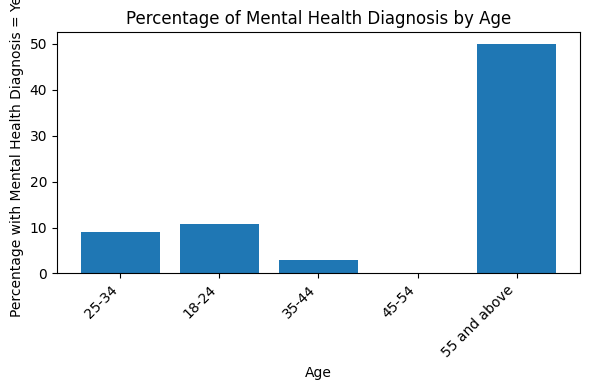

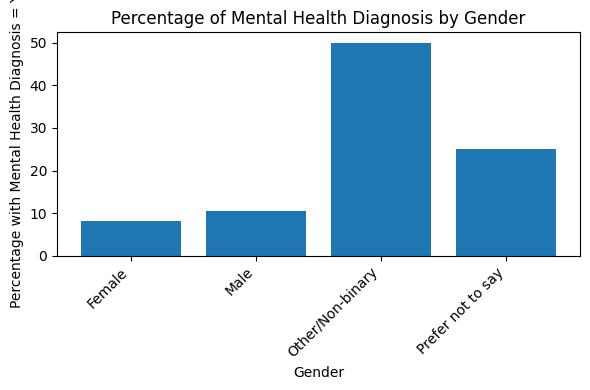

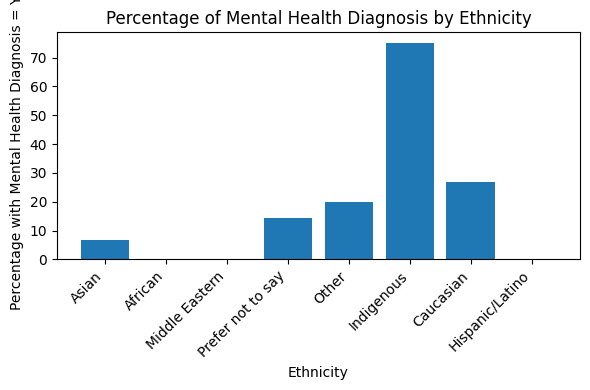

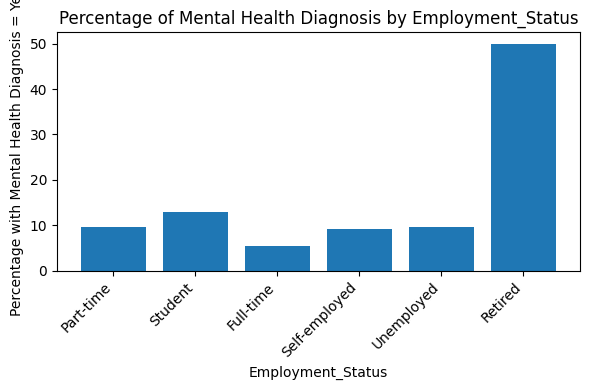

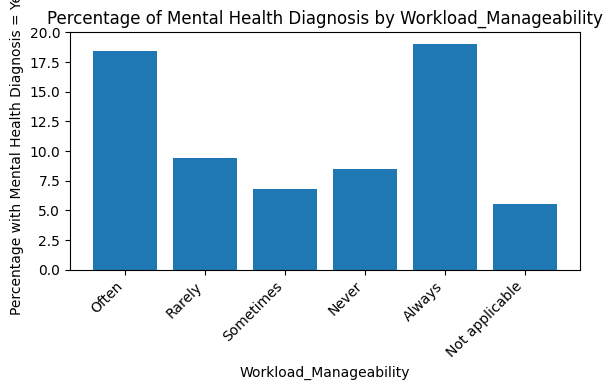

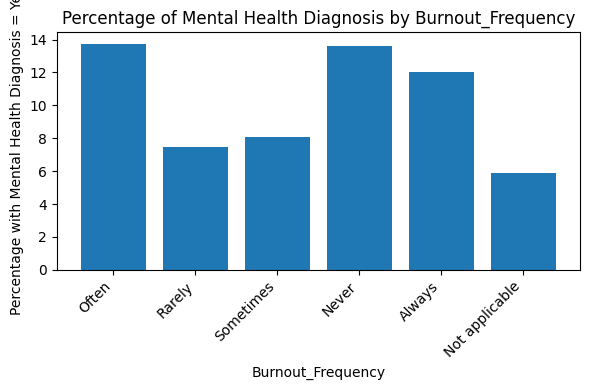

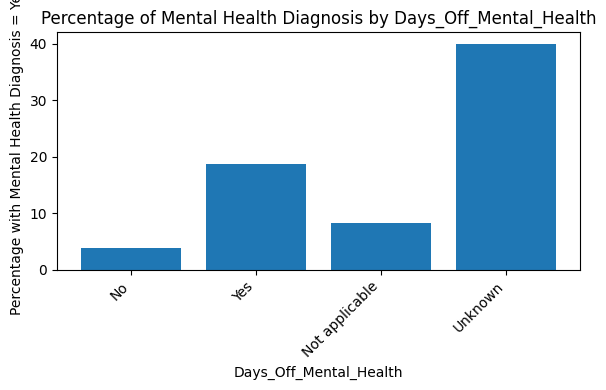

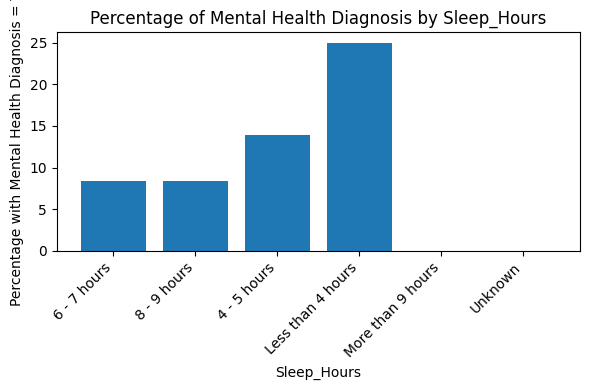

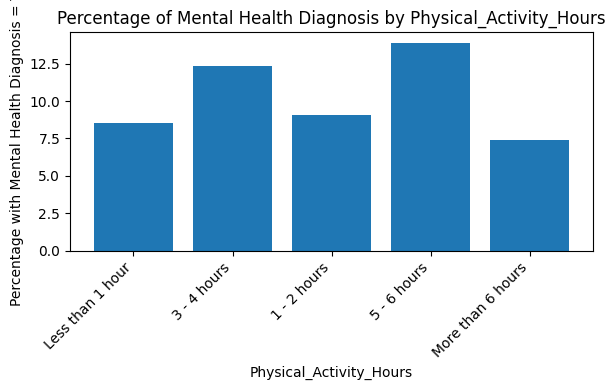

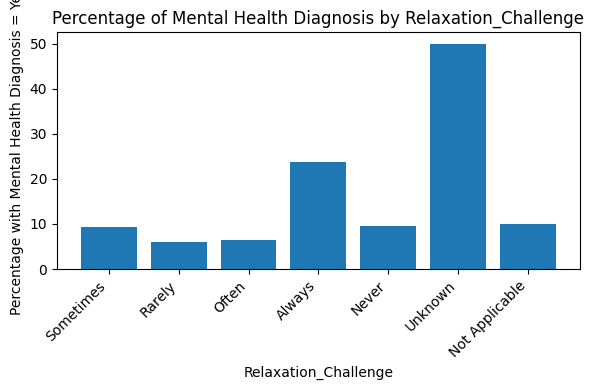

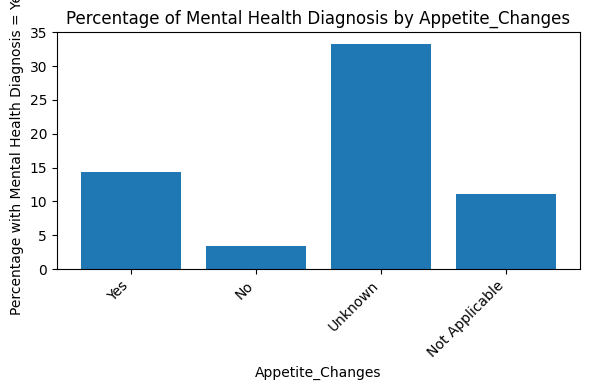

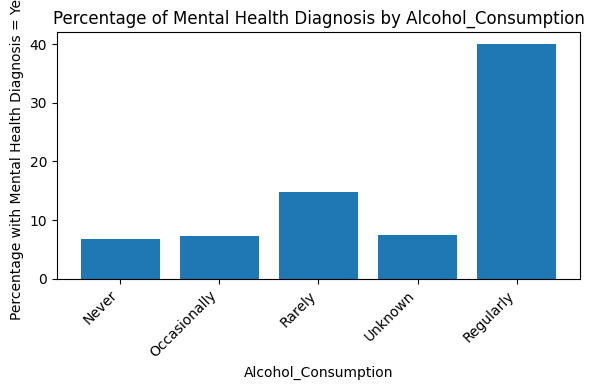

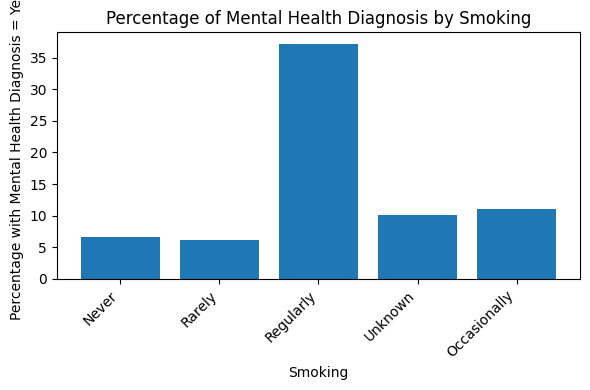

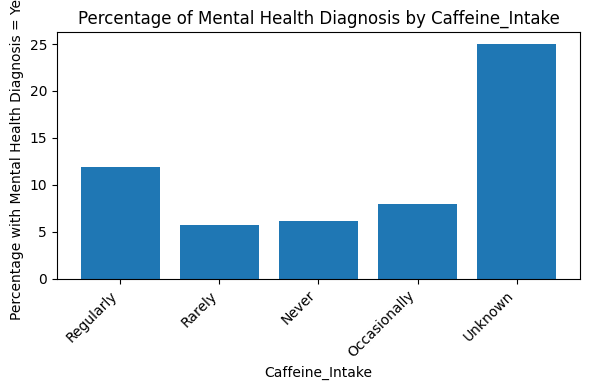

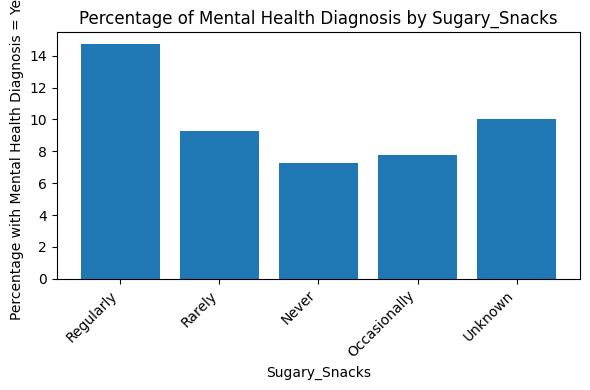

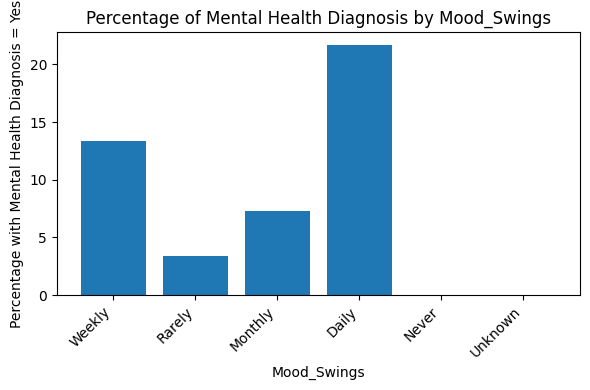

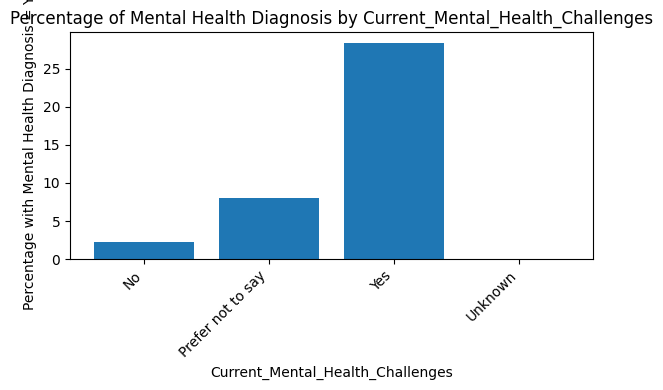

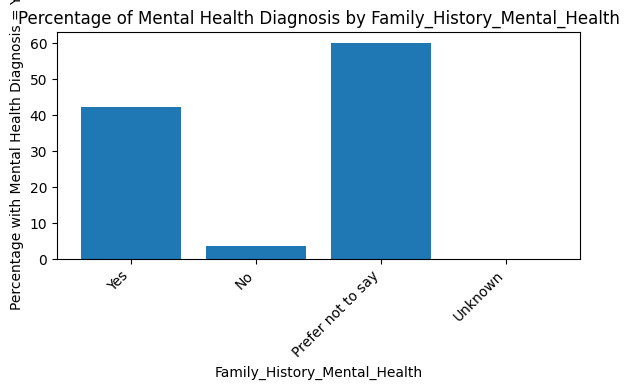

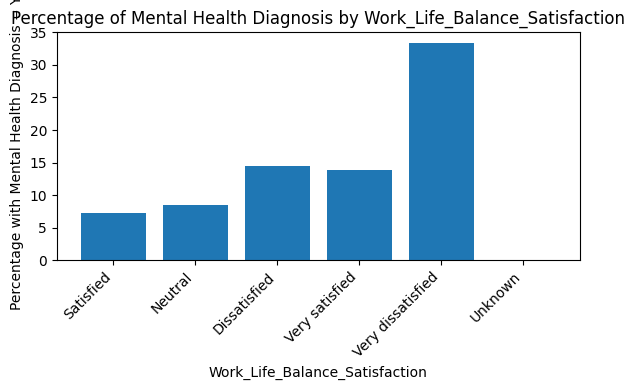

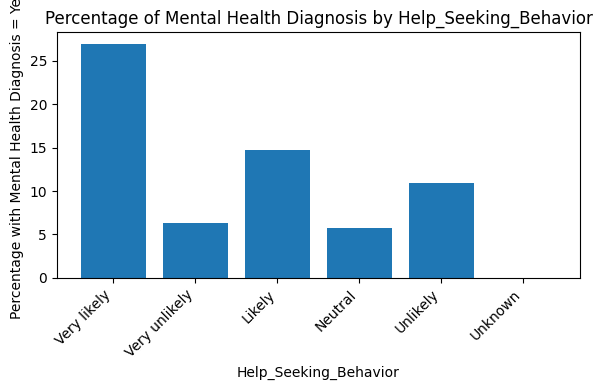

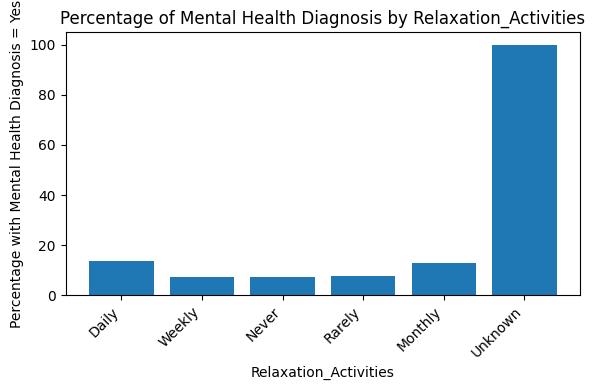

In [146]:
# Function to calculate percentages and create plot for a given column
def plot_diagnosis_percentage(df, column_name):
    """Calculates and plots the percentage of 'Yes' in 'Mental_Health_Diagnosis' for each category in the specified column."""
    categories = df[column_name].unique()
    percentages = []
    for category in categories:
        total_in_category = len(df[df[column_name] == category])
        yes_in_category = len(df[(df[column_name] == category) & (df['Mental_Health_Diagnosis'] == 'Yes')])
        if total_in_category > 0:
            percentage = (yes_in_category / total_in_category) * 100
        else:
            percentage = 0
        percentages.append(percentage)

    plt.figure(figsize=(6,4))
    plt.bar(categories, percentages)
    plt.xlabel(column_name)
    plt.ylabel('Percentage with Mental Health Diagnosis = Yes')
    plt.title(f'Percentage of Mental Health Diagnosis by {column_name}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


# Get a list of all columns except 'Mental_Health_Diagnosis'
columns_to_plot = [col for col in mental_health_df.columns if col != 'Mental_Health_Diagnosis']

# Loop through each column and generate the plot
for col in columns_to_plot:
    plot_diagnosis_percentage(mental_health_df, col)


**ENCODING**

In [147]:
# Perform one-hot encoding on specified columns
columns_to_encode = ['Gender', 'Ethnicity', 'Employment_Status', 'Current_Mental_Health_Challenges', 'Family_History_Mental_Health']
mental_health_df = pd.get_dummies(mental_health_df, columns=columns_to_encode, drop_first=True,dtype=int)


In [148]:
#Defining functions for Ordinal encoding
def ordinal_encode_features(df, mappings):
    """
    Applies ordinal encoding to specified features in a DataFrame.

    Args:
        df: The input DataFrame.
        mappings: A dictionary where keys are feature names and values are dictionaries
                  mapping feature values to their ordinal representations.

    Returns:
        The DataFrame with ordinal encoded features.
    """
    df_encoded = df.copy()
    for feature, mapping in mappings.items():
        if feature in df_encoded.columns:
            df_encoded[feature] = df_encoded[feature].map(mapping).fillna(-1)  # Default to -1 for unmapped values
    return df_encoded


age_mapping = {'25-34': 3, '18-24': 4, '35-44': 2, '45-54': 1, '55 and above': 5}
workload_mapping = {'Often': 4, 'Rarely': 3, 'Sometimes': 1, 'Never': 2, 'Always': 5, 'Not applicable': -1}
burnout_mapping = {'Often': 5, 'Rarely': 1, 'Sometimes': 2, 'Never': 4, 'Always': 3, 'Not applicable': -1}
sleep_mapping = {'6 - 7 hours': 3, '8 - 9 hours': 3, '4 - 5 hours': 4, 'Less than 4 hours': 5, 'More than 9 hours': 1, 'Unknown': -1}
activity_mapping = {'Less than 1 hour': 2, '3 - 4 hours': 4, '1 - 2 hours': 3, '5 - 6 hours': 5, 'More than 6 hours': 1}
relaxation_mapping = {'Sometimes': 4, 'Rarely': 1, 'Often': 2, 'Always': 5, 'Never': 3, 'Unknown': -1, 'Not Applicable': -1}
mood_mapping = {'Weekly': 4, 'Rarely': 2, 'Monthly': 3, 'Daily': 5, 'Never': 1, 'Unknown': -1}
worklife_mapping = {'Satisfied': 1, 'Neutral': 2, 'Dissatisfied': 4, 'Very satisfied': 3, 'Very dissatisfied': 5}
help_mapping = {'Very likely': 5, 'Very unlikely': 2, 'Likely': 4, 'Neutral': 1, 'Unlikely': 3, 'Unknown': -1}
relaxation_act_mapping = {'Daily': 5, 'Weekly': 1, 'Never': 2, 'Rarely': 3, 'Monthly': 4, 'Unknown': -1}
Days_Off_Mental_Health_mapping= {'No': 0, 'Yes': 1, 'Not applicable': -1, 'Unknown': -1}
Appetite_Change_mappings= {'Yes': 1, 'No': 0, 'Unknown': -1, 'Not Applicable': -1}
diagnosis_mapping = {'Yes': 1, 'No': 0}


mappings = {
    'Age': age_mapping,
    'Workload_Manageability': workload_mapping,
    'Burnout_Frequency': burnout_mapping,
    'Sleep_Hours': sleep_mapping,
    'Physical_Activity_Hours': activity_mapping,
    'Relaxation_Challenge': relaxation_mapping,
    'Mood_Swings': mood_mapping,
    'Work_Life_Balance_Satisfaction': worklife_mapping,
    'Help_Seeking_Behavior': help_mapping,
    'Relaxation_Activities': relaxation_act_mapping,
    'Days_Off_Mental_Health': Days_Off_Mental_Health_mapping ,
    'Appetite_Changes': Appetite_Change_mappings,
    'Mental_Health_Diagnosis': diagnosis_mapping
}

mental_health_df = ordinal_encode_features(mental_health_df, mappings)

In [149]:
# Frequency Encoding for suitable variables
for col in ['Alcohol_Consumption', 'Smoking', 'Caffeine_Intake', 'Sugary_Snacks']:
    freq_map = mental_health_df[col].value_counts(normalize=True).to_dict()
    mental_health_df[col] = mental_health_df[col].map(freq_map)


In [150]:
mental_health_df.head(5)

,Age,Workload_Manageability,Burnout_Frequency,Days_Off_Mental_Health,Sleep_Hours,Physical_Activity_Hours,Relaxation_Challenge,Appetite_Changes,Alcohol_Consumption,Smoking,...,Employment_Status_Retired,Employment_Status_Self-employed,Employment_Status_Student,Employment_Status_Unemployed,Current_Mental_Health_Challenges_Prefer not to say,Current_Mental_Health_Challenges_Unknown,Current_Mental_Health_Challenges_Yes,Family_History_Mental_Health_Prefer not to say,Family_History_Mental_Health_Unknown,Family_History_Mental_Health_Yes
0,3,4,5,0,3,2,4,1,0.505308,0.636943,...,0,0,0,0,0,0,0,0,0,1
1,3,3,1,0,3,2,4,0,0.505308,0.636943,...,0,0,1,0,0,0,0,0,0,0
2,4,3,1,0,3,2,4,0,0.505308,0.636943,...,0,0,0,0,0,0,0,0,0,0
3,3,1,2,1,3,4,4,0,0.505308,0.636943,...,0,0,0,0,0,0,0,0,0,0
4,3,4,5,1,3,2,4,1,0.146497,0.104034,...,0,0,1,0,0,0,0,0,0,1


In [151]:
mental_health_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 471 entries, 0 to 498
Data columns (total 38 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 471 non-null    int64  
 1   Workload_Manageability                              471 non-null    int64  
 2   Burnout_Frequency                                   471 non-null    int64  
 3   Days_Off_Mental_Health                              471 non-null    int64  
 4   Sleep_Hours                                         471 non-null    int64  
 5   Physical_Activity_Hours                             471 non-null    int64  
 6   Relaxation_Challenge                                471 non-null    int64  
 7   Appetite_Changes                                    471 non-null    int64  
 8   Alcohol_Consumption                                 471 non-null    float64
 9   Smok

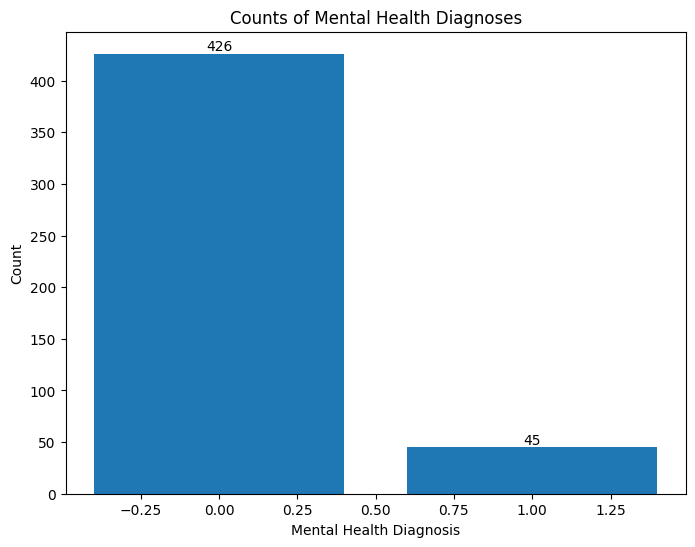

In [152]:
# Plot target column
diagnosis_counts = mental_health_df['Mental_Health_Diagnosis'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(diagnosis_counts.index, diagnosis_counts.values)

# Add counts above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.xlabel("Mental Health Diagnosis")
plt.ylabel("Count")
plt.title("Counts of Mental Health Diagnoses")
plt.show()


**BASIC MODELLING**

In [153]:
# Define features (X) and target (y)
X = mental_health_df.drop('Mental_Health_Diagnosis', axis=1)
y = mental_health_df['Mental_Health_Diagnosis']

In [154]:
from sklearn.model_selection import train_test_split

#Split the data for training,validation and testing
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.15, random_state=42)

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)


Training set size: (379, 37)
Validation set size: (68, 37)
Test set size: (24, 37)


**1) Decision tree classifier**

In [155]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Initialize and train a Decisiontree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on training, validation, and testing sets
y_train_pred = dt_classifier.predict(X_train)
y_val_pred = dt_classifier.predict(X_val)
y_test_pred = dt_classifier.predict(X_test)

# Evaluate the model
def evaluate_model(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    return cm, accuracy

# Training set evaluation
cm_train, accuracy_train = evaluate_model(y_train, y_train_pred)
print("Training Set:")
print("Confusion Matrix:\n", cm_train)
print("Accuracy:", accuracy_train)
print("-" * 20)


# Validation set evaluation
cm_val, accuracy_val = evaluate_model(y_val, y_val_pred)
print("Validation Set:")
print("Confusion Matrix:\n", cm_val)
print("Accuracy:", accuracy_val)
print("-" * 20)


# Testing set evaluation
cm_test, accuracy_test = evaluate_model(y_test, y_test_pred)
print("Testing Set:")
print("Confusion Matrix:\n", cm_test)
print("Accuracy:", accuracy_test)

Training Set:
Confusion Matrix:
 [[345   0]
 [  0  34]]
Accuracy: 1.0
--------------------
Validation Set:
Confusion Matrix:
 [[56  4]
 [ 4  4]]
Accuracy: 0.8823529411764706
--------------------
Testing Set:
Confusion Matrix:
 [[21  0]
 [ 2  1]]
Accuracy: 0.9166666666666666


Decision Tree model exhibits perfect accuracy (100%) on the training set, indicating potential overfitting, as its performance drops on the validation (86.17%) and testing (81.05%) sets. The confusion matrices reveal that while the model classifies most cases correctly, it struggles with false positives and false negatives, especially in the minority class. This suggests that the model is capturing noise in the training data rather than generalizable patterns.

**2) Random forest classifier**

In [156]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42,class_weight="balanced")
rf_classifier.fit(X_train, y_train)

# Make predictions on training, validation, and testing sets
y_train_pred = rf_classifier.predict(X_train)
y_val_pred = rf_classifier.predict(X_val)
y_test_pred = rf_classifier.predict(X_test)

# Evaluate the model
def evaluate_model(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    return cm, accuracy

# Training set evaluation
cm_train, accuracy_train = evaluate_model(y_train, y_train_pred)
print("Training Set:")
print("Confusion Matrix:\n", cm_train)
print("Accuracy:", accuracy_train)
print("-" * 20)


# Validation set evaluation
cm_val, accuracy_val = evaluate_model(y_val, y_val_pred)
print("Validation Set:")
print("Confusion Matrix:\n", cm_val)
print("Accuracy:", accuracy_val)
print("-" * 20)


# Testing set evaluation
cm_test, accuracy_test = evaluate_model(y_test, y_test_pred)
print("Testing Set:")
print("Confusion Matrix:\n", cm_test)
print("Accuracy:", accuracy_test)


Training Set:
Confusion Matrix:
 [[345   0]
 [  0  34]]
Accuracy: 1.0
--------------------
Validation Set:
Confusion Matrix:
 [[59  1]
 [ 6  2]]
Accuracy: 0.8970588235294118
--------------------
Testing Set:
Confusion Matrix:
 [[21  0]
 [ 2  1]]
Accuracy: 0.9166666666666666


In [157]:
# Calculate ROC AUC scores
train_roc_auc = roc_auc_score(y_train, rf_classifier.predict_proba(X_train)[:, 1])
val_roc_auc = roc_auc_score(y_val, rf_classifier.predict_proba(X_val)[:, 1])
print(f"Train ROC AUC: {train_roc_auc}")
print(f"Validation ROC AUC: {val_roc_auc}")

Train ROC AUC: 1.0
Validation ROC AUC: 0.8760416666666667


Random Forest model demonstrates perfect accuracy (100%) on the training set, suggesting strong learning but also a potential risk of overfitting. However, its performance on the validation (91.49%) and testing sets (88.42%) has improved compared to the Decision Tree, indicating better generalization. The confusion matrices show that the model significantly reduces false positives but still struggles with false negatives, especially in the minority class (only 1 true positive vs. 11 false negatives in the test set).

In [158]:
# checking imbalance in target column
# Calculate the percentage of each category in the target variable
diagnosis_percentages = mental_health_df['Mental_Health_Diagnosis'].value_counts(normalize=True) * 100
diagnosis_percentages

Mental_Health_Diagnosis
0    90.44586
1     9.55414
Name: proportion, dtype: float64

Mental_Health_Diagnosis is highly imbalanced, with 90.45% of instances belonging to Class 0 (no diagnosis) and only 9.55% belonging to Class 1 (diagnosed with a mental health condition). This imbalance can lead to biased model performance, where the model may predict the majority class more often, resulting in high accuracy but poor recall for the minority class.

**ADVANCED MODELLING**

**3) Random Forest Classifier with SMOTE**

In [159]:
# !pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42,class_weight={0: 1, 1: 3})
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_train_pred = rf_classifier.predict(X_train_resampled)
y_val_pred = rf_classifier.predict(X_val)
y_test_pred = rf_classifier.predict(X_test)

# Evaluate the model
def evaluate_model(y_true, y_pred):
  print(classification_report(y_true, y_pred))
  print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
  print("Accuracy:", accuracy_score(y_true, y_pred))
  print("-" * 20)

print("Training Set:")
evaluate_model(y_train_resampled, y_train_pred)

print("Validation Set:")
evaluate_model(y_val, y_val_pred)

print("Testing Set:")
evaluate_model(y_test, y_test_pred)


Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       345
           1       1.00      1.00      1.00       345

    accuracy                           1.00       690
   macro avg       1.00      1.00      1.00       690
weighted avg       1.00      1.00      1.00       690

Confusion Matrix:
 [[345   0]
 [  0 345]]
Accuracy: 1.0
--------------------
Validation Set:
              precision    recall  f1-score   support

           0       0.90      1.00      0.94        60
           1       1.00      0.12      0.22         8

    accuracy                           0.90        68
   macro avg       0.95      0.56      0.58        68
weighted avg       0.91      0.90      0.86        68

Confusion Matrix:
 [[60  0]
 [ 7  1]]
Accuracy: 0.8970588235294118
--------------------
Testing Set:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      

**4) Random Forest with GridsearchCV and SMOTE+ENN**

In [160]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score # Import roc_auc_score

# Apply SMOTE+ENN
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [8, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

rf_classifier = RandomForestClassifier(random_state=42, class_weight={0: 1, 1: 4})

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

best_rf_classifier = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the best model
def evaluate_model(y_true, y_pred):
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("-" * 20)

y_train_pred = best_rf_classifier.predict(X_train_resampled)
y_val_pred = best_rf_classifier.predict(X_val)
y_test_pred = best_rf_classifier.predict(X_test)

print("Training Set:")
evaluate_model(y_train_resampled, y_train_pred)
print("Validation Set:")
evaluate_model(y_val, y_val_pred)
print("Testing Set:")
evaluate_model(y_test, y_test_pred)


Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Training Set:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       235
           1       0.99      1.00      0.99       344

    accuracy                           0.99       579
   macro avg       0.99      0.99      0.99       579
weighted avg       0.99      0.99      0.99       579

Confusion Matrix:
 [[231   4]
 [  0 344]]
Accuracy: 0.9930915371329879
--------------------
Validation Set:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89        60
           1       0.31      0.50      0.38         8

    accuracy                           0.81        68
   macro avg       0.62      0.68      0.63        68
weighted avg       0.85      0.81      0.83        68

Confusion Matrix:
 [[51  9]
 [ 4  4]]
Accuracy: 0.8088235294117647
--------------------
Testing Set:
              p

In [161]:
train_roc_auc = roc_auc_score(y_train_resampled, best_rf_classifier.predict_proba(X_train_resampled)[:, 1])
val_roc_auc = roc_auc_score(y_val, best_rf_classifier.predict_proba(X_val)[:, 1])

print(f"Train ROC AUC (best model): {train_roc_auc}")
print(f"Validation ROC AUC (best model): {val_roc_auc}")

Train ROC AUC (best model): 1.0
Validation ROC AUC (best model): 0.8270833333333334


**5. RandomForest with GridsearchCV and ADASYN**

In [162]:
from imblearn.over_sampling import ADASYN

# Apply ADASYN
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [8, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

rf_classifier = RandomForestClassifier(random_state=42)  # Remove class_weight

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

best_rf_classifier = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the best model
def evaluate_model(y_true, y_pred):
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("-" * 20)

y_train_pred = best_rf_classifier.predict(X_train_resampled)
y_val_pred = best_rf_classifier.predict(X_val)
y_test_pred = best_rf_classifier.predict(X_test)

print("Training Set:")
evaluate_model(y_train_resampled, y_train_pred)
print("Validation Set:")
evaluate_model(y_val, y_val_pred)
print("Testing Set:")
evaluate_model(y_test, y_test_pred)

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       345
           1       1.00      1.00      1.00       350

    accuracy                           1.00       695
   macro avg       1.00      1.00      1.00       695
weighted avg       1.00      1.00      1.00       695

Confusion Matrix:
 [[344   1]
 [  0 350]]
Accuracy: 0.9985611510791367
--------------------
Validation Set:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        60
           1       0.60      0.38      0.46         8

    accuracy                           0.90        68
   macro avg       0.76      0.67      0.70        68
weighted avg       0.88      0.90      0.89        68

Confusion Matrix:
 [[58  2]
 [ 5  3]]
Accuracy: 0.8970588235294118
--------------------
Testing Set:
              p

In [163]:
train_roc_auc = roc_auc_score(y_train_resampled, best_rf_classifier.predict_proba(X_train_resampled)[:, 1])
val_roc_auc = roc_auc_score(y_val, best_rf_classifier.predict_proba(X_val)[:, 1])

print(f"Train ROC AUC (best model): {train_roc_auc}")
print(f"Validation ROC AUC (best model): {val_roc_auc}")

Train ROC AUC (best model): 0.9999503105590062
Validation ROC AUC (best model): 0.8145833333333333


**CHECKING MULTICOLLINEARITY AMONG VARIABLES**

In [164]:
#Define function for checking multicollinearity
def check_multicollinearity(df, threshold=0.8):
  """
  Checks for multicollinearity in a Pandas DataFrame.

  Args:
    df: The input DataFrame.
    threshold: The correlation coefficient threshold above which multicollinearity is flagged.

  Returns:
    None. Prints the pairs of columns exhibiting multicollinearity or a message indicating no multicollinearity.
  """
  corr_matrix = df.corr().abs()
  upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
  collinear_pairs = [(col1, col2) for col1, col2 in upper_triangle.stack().index if upper_triangle.loc[col1, col2] > threshold]
  if collinear_pairs:
    print("Variables with multicollinearity (correlation > {}):".format(threshold))
    for pair in collinear_pairs:
      print(pair)
  else:
    print("No variables have multicollinearity above the specified threshold.")

check_multicollinearity(mental_health_df)


No variables have multicollinearity above the specified threshold.


**FEATURE IMPORTANCE**

                                              Feature  Importance
33               Current_Mental_Health_Challenges_Yes    0.117204
8                                 Alcohol_Consumption    0.111919
19                                    Ethnicity_Asian    0.101350
12                                        Mood_Swings    0.071472
9                                             Smoking    0.069351
11                                      Sugary_Snacks    0.064675
36                   Family_History_Mental_Health_Yes    0.057053
10                                    Caffeine_Intake    0.046718
13                     Work_Life_Balance_Satisfaction    0.044432
2                                   Burnout_Frequency    0.034414
14                              Help_Seeking_Behavior    0.031479
15                              Relaxation_Activities    0.031010
7                                    Appetite_Changes    0.030096
6                                Relaxation_Challenge    0.029809
16        

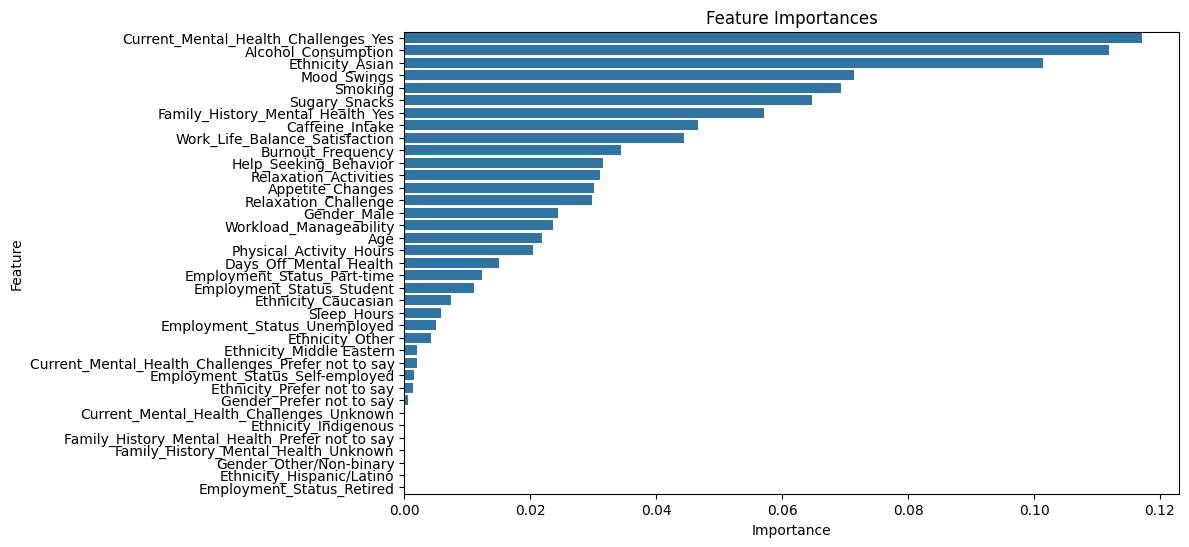

In [165]:

# Get feature importances from the best RandomForestClassifier
feature_importances = best_rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

# You can also visualize the feature importances using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()


In [166]:
# Filter features with importance greater than 0
important_features = feature_importance_df[feature_importance_df['Importance'] > 0.05]['Feature'].tolist()

# Create a new DataFrame with only the important features
X_train_important = X_train_resampled[important_features]
X_val_important = X_val[important_features]
X_test_important = X_test[important_features]

# Initialize and train a RandomForestClassifier with the important features
rf_classifier_important = RandomForestClassifier(random_state=42, **grid_search.best_params_) # Use best parameters from gridsearch
rf_classifier_important.fit(X_train_important, y_train_resampled)

# Make predictions
y_train_pred_important = rf_classifier_important.predict(X_train_important)
y_val_pred_important = rf_classifier_important.predict(X_val_important)
y_test_pred_important = rf_classifier_important.predict(X_test_important)

# Evaluate the model
print("Training Set (Important Features):")
evaluate_model(y_train_resampled, y_train_pred_important)
print("Validation Set (Important Features):")
evaluate_model(y_val, y_val_pred_important)
print("Testing Set (Important Features):")
evaluate_model(y_test, y_test_pred_important)


Training Set (Important Features):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       345
           1       0.97      0.97      0.97       350

    accuracy                           0.97       695
   macro avg       0.97      0.97      0.97       695
weighted avg       0.97      0.97      0.97       695

Confusion Matrix:
 [[336   9]
 [ 12 338]]
Accuracy: 0.9697841726618706
--------------------
Validation Set (Important Features):
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        60
           1       0.56      0.62      0.59         8

    accuracy                           0.90        68
   macro avg       0.75      0.78      0.76        68
weighted avg       0.90      0.90      0.90        68

Confusion Matrix:
 [[56  4]
 [ 3  5]]
Accuracy: 0.8970588235294118
--------------------
Testing Set (Important Features):
              precision    recall  f1-score   support

     

In [167]:
train_roc_auc = roc_auc_score(y_train_resampled, best_rf_classifier.predict_proba(X_train_resampled)[:, 1])
val_roc_auc = roc_auc_score(y_val, best_rf_classifier.predict_proba(X_val)[:, 1])

print(f"Train ROC AUC (best model): {train_roc_auc}")
print(f"Validation ROC AUC (best model): {val_roc_auc}")


Train ROC AUC (best model): 0.9999503105590062
Validation ROC AUC (best model): 0.8145833333333333


**AUGMENTATION**

In [168]:
# from sdv.metadata import SingleTableMetadata
# from sdv.single_table import CTGANSynthesizer
# import pandas as pd

# # Load your dataset
# df = pd.read_csv("/content/cleaned_data.csv")

# # Define the target column and class values
# target_column = 'Mental_Health_Diagnosis'  # Replace with your target column name
# # Identify the minority and majority classes
# class_counts = df['Mental_Health_Diagnosis'].value_counts()
# minority_class_value = class_counts.idxmin()  # Minority class
# majority_class_value = class_counts.idxmax()  # Majority class

# # Separate the minority and majority classes
# minority_class = df[df['Mental_Health_Diagnosis'] == minority_class_value]
# majority_class = df[df['Mental_Health_Diagnosis'] == majority_class_value]

# # Calculate the number of samples needed for each class
# total_samples = 10000
# minority_samples = int(0.3 * total_samples)  # 3,000 samples
# majority_samples = int(0.7 * total_samples)  # 7,000 samples

# # Create metadata for the minority class
# minority_metadata = SingleTableMetadata()
# minority_metadata.detect_from_dataframe(minority_class)

# # Initialize and train the CTGAN model on the minority class
# minority_model = CTGANSynthesizer(minority_metadata)
# minority_model.fit(minority_class)

# # Generate synthetic data for the minority class
# # Calculate the number of synthetic samples needed
# num_synthetic_minority_samples = minority_samples - len(minority_class)
# synthetic_minority = minority_model.sample(num_synthetic_minority_samples)

# # Sample the majority class to match the desired count
# # If the majority class has more samples than needed, randomly sample 7,000 rows
# if len(majority_class) > majority_samples:
#     majority_class = majority_class.sample(majority_samples, random_state=42)
# else:
#     # If the majority class has fewer samples, generate synthetic data for it too
#     majority_metadata = SingleTableMetadata()
#     majority_metadata.detect_from_dataframe(majority_class)
#     majority_model = CTGANSynthesizer(majority_metadata)
#     majority_model.fit(majority_class)
#     num_synthetic_majority_samples = majority_samples - len(majority_class)
#     synthetic_majority = majority_model.sample(num_synthetic_majority_samples)
#     majority_class = pd.concat([majority_class, synthetic_majority], ignore_index=True)

# # Combine the minority and majority classes
# final_df = pd.concat([minority_class, synthetic_minority, majority_class], ignore_index=True)

# # Save the final dataset to a CSV file
# final_df.to_csv("imbalanced_3_7_dataset.csv", index=False)
# print("Dataset with 10,000 rows and a 3:7 ratio generated and saved successfully!")

# from google.colab import files
# files.download('imbalanced_3_7_dataset.csv')

**MODELLING USING AUGMENTED DATA WITH PIPELINING**

In [169]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier
import io
import requests
import warnings
warnings.filterwarnings("ignore")

class MentalHealthModel:
    def __init__(self):
        self.pipeline = Pipeline([
            ('scaler', MinMaxScaler()),
            ('selector', SelectKBest(chi2, k=16)),
            ('classifier', CatBoostClassifier(iterations=100, random_seed=42, verbose=0))
        ])
        self.selected_feature_names = None

    def preprocess_mental_health_data(self, input_df):
        processed_df = input_df.copy()
        columns_to_encode = ['Gender', 'Ethnicity', 'Employment_Status', 'Current_Mental_Health_Challenges', 'Family_History_Mental_Health']
        processed_df = pd.get_dummies(processed_df, columns=columns_to_encode, drop_first=False, dtype=int)

        mappings = {
        'Age': {'25-34': 3, '18-24': 4, '35-44': 2, '45-54': 1, '55 and above': 5},
        'Workload_Manageability': {'Often': 4, 'Rarely': 3, 'Sometimes': 1, 'Never': 2, 'Always': 5, 'Not applicable': -1},
        'Burnout_Frequency': {'Often': 5, 'Rarely': 1, 'Sometimes': 2, 'Never': 4, 'Always': 3, 'Not applicable': -1},
        'Sleep_Hours': {'6 - 7 hours': 3, '8 - 9 hours': 3, '4 - 5 hours': 4, 'Less than 4 hours': 5, 'More than 9 hours': 1, 'Unknown': -1},
        'Physical_Activity_Hours': {'Less than 1 hour': 2, '3 - 4 hours': 4, '1 - 2 hours': 3, '5 - 6 hours': 5, 'More than 6 hours': 1},
        'Relaxation_Challenge': {'Sometimes': 4, 'Rarely': 1, 'Often': 2, 'Always': 5, 'Never': 3, 'Unknown': -1, 'Not Applicable': -1},
        'Mood_Swings': {'Weekly': 4, 'Rarely': 2, 'Monthly': 3, 'Daily': 5, 'Never': 1, 'Unknown': -1},
        'Work_Life_Balance_Satisfaction': {'Satisfied': 1, 'Neutral': 2, 'Dissatisfied': 4, 'Very satisfied': 3, 'Very dissatisfied': 5},
        'Help_Seeking_Behavior': {'Very likely': 5, 'Very unlikely': 2, 'Likely': 4, 'Neutral': 1, 'Unlikely': 3, 'Unknown': -1},
        'Relaxation_Activities': {'Daily': 5, 'Weekly': 1, 'Never': 2, 'Rarely': 3, 'Monthly': 4, 'Unknown': -1},
        'Days_Off_Mental_Health': {'No': 0, 'Yes': 1, 'Not applicable': -1, 'Unknown': -1},
        'Appetite_Changes': {'Yes': 1, 'No': 0, 'Unknown': -1, 'Not Applicable': -1},
        'Mental_Health_Diagnosis': {'Yes': 1, 'No': 0}
    }
        for feature, mapping in mappings.items():
            if feature in processed_df.columns:
                processed_df[feature] = processed_df[feature].map(mapping).fillna(-1)

        # Frequency encoding for specific columns
        for col in ['Alcohol_Consumption', 'Smoking', 'Caffeine_Intake', 'Sugary_Snacks']:
            freq_map = processed_df[col].value_counts(normalize=True).to_dict()
            processed_df[col] = processed_df[col].map(freq_map)

        return processed_df

    def handle_imbalance(self, X_train, y_train):
        train_data = pd.concat([X_train, y_train], axis=1)
        majority_class = train_data[train_data['Mental_Health_Diagnosis'] == 0]
        minority_class = train_data[train_data['Mental_Health_Diagnosis'] == 1]
        majority_downsampled = resample(
            majority_class,
            replace=True,
            n_samples=4842,
            random_state=42
        )
        downsampled_train_data = pd.concat([majority_downsampled, minority_class])
        X_train_downsampled = downsampled_train_data.drop('Mental_Health_Diagnosis', axis=1)
        y_train_downsampled = downsampled_train_data['Mental_Health_Diagnosis']
        return X_train_downsampled, y_train_downsampled

    def fit(self, X, y):
        self.pipeline.fit(X, y)

    def predict(self, X):
        return self.pipeline.predict(X)

    def predict_proba(self, X):
        return self.pipeline.predict_proba(X)[:, 1]

    def save_model(self, file_name):
        with open(file_name, 'wb') as f:
            pickle.dump(self, f)

# Load data
# Load data
df_url = 'https://raw.githubusercontent.com/AnjuSalyGeorge/Capstone-Project-2-Group-6----Early-detection-of-mental-illness-using-AI-/refs/heads/main/new_data_7_3.csv'
url_content = requests.get(df_url, verify=False).content

#Read the imported CSV data into a DataFrame
mental_health_new_df = pd.read_csv(io.StringIO(url_content.decode('utf-8')))
model = MentalHealthModel()
mental_health_new_df = model.preprocess_mental_health_data(mental_health_new_df)

X = mental_health_new_df.drop('Mental_Health_Diagnosis', axis=1)
y = mental_health_new_df['Mental_Health_Diagnosis']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.15, random_state=42)

X_train, y_train = model.handle_imbalance(X_train, y_train)

model.fit(X_train, y_train)

roc_auc_train = roc_auc_score(y_train, model.predict_proba(X_train))
roc_auc_val = roc_auc_score(y_val, model.predict_proba(X_val))
roc_auc_test = roc_auc_score(y_test, model.predict_proba(X_test))

print(f"ROC AUC Train: {roc_auc_train}")
print(f"ROC AUC Validation: {roc_auc_val}")
print(f"ROC AUC Test: {roc_auc_test}")

# Save model
model.save_model("mental_health_model.pkl")

ROC AUC Train: 0.9396698156584927
ROC AUC Validation: 0.9271322083079514
ROC AUC Test: 0.9120543953375425


**FINAL MODEL EVALUATION**


Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4842
           1       0.85      0.78      0.81      2421

    accuracy                           0.88      7263
   macro avg       0.87      0.85      0.86      7263
weighted avg       0.88      0.88      0.88      7263


Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       991
           1       0.81      0.78      0.80       434

    accuracy                           0.88      1425
   macro avg       0.86      0.85      0.86      1425
weighted avg       0.88      0.88      0.88      1425


Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       355
           1       0.77      0.72      0.74       145

    accuracy                           0.86       500
   m

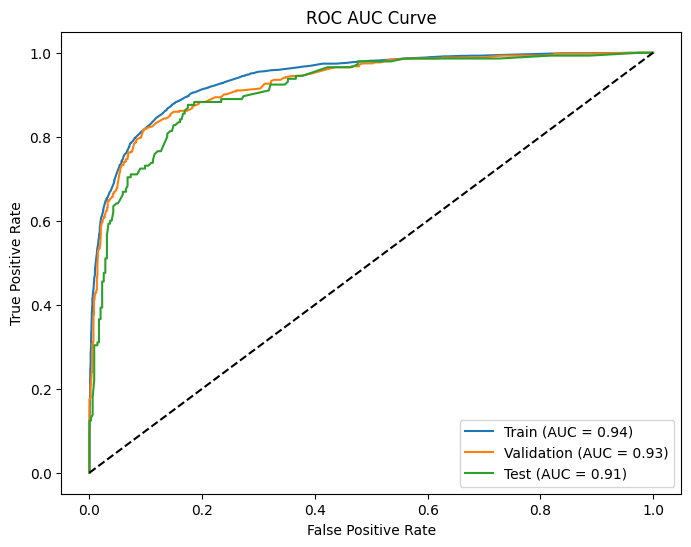

In [170]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict classes for train, validation, and test sets
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Print classification reports
print("\nClassification Report for Training Set:")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report for Validation Set:")
print(classification_report(y_val, y_val_pred))

print("\nClassification Report for Testing Set:")
print(classification_report(y_test, y_test_pred))


# ROC AUC Curve
fpr_train, tpr_train, _ = roc_curve(y_train, model.predict_proba(X_train))
roc_auc_train = auc(fpr_train, tpr_train)

fpr_val, tpr_val, _ = roc_curve(y_val, model.predict_proba(X_val))
roc_auc_val = auc(fpr_val, tpr_val)

fpr_test, tpr_test, _ = roc_curve(y_test, model.predict_proba(X_test))
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_val, tpr_val, label=f'Validation (AUC = {roc_auc_val:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc='lower right')
plt.show()
